# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.cm
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def display_random_images(x, y, x_cnt=5, y_cnt=2):
    %matplotlib inline
    plt.rcdefaults()
    
    fig, axes = plt.subplots(y_cnt, x_cnt, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.5, wspace=0.05)
    for ax in axes.flat:
        idx = random.randint(0, len(x))
        if len(x[idx].shape) < 3 or x[idx].shape[2] == 1:
            img = x[idx].copy()
            ax.imshow(img.reshape(img.shape[0:2]), cmap=matplotlib.cm.gray)
        else:
            ax.imshow(x[idx])
        ax.set_title("class={}".format(y[idx]))
        ax.axis('off')
    
    plt.show()


def display_images(images, y_cnt, x_cnt, figsize=(2, 2), hspace=0.5, wspace=0.05):
    %matplotlib inline
    plt.rcdefaults()
    
    fig, axes = plt.subplots(y_cnt, x_cnt, figsize=figsize)
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
    idx = 0
    if (x_cnt, y_cnt) == (1, 1):
        axes = [axes]
    else:
        axes = axes.flat
    for ax in axes:
        if idx >= len(images):
            break
        image = images[idx]
        if len(image.shape) < 3 or image.shape[2] == 1:
            img = image.copy()
            ax.imshow(img.reshape(img.shape[0:2]), cmap=matplotlib.cm.gray)
        else:
            ax.imshow(image)
        idx += 1
        #ax.set_title("class={}".format(y[idx]))
        ax.axis('off')
    
    plt.show()

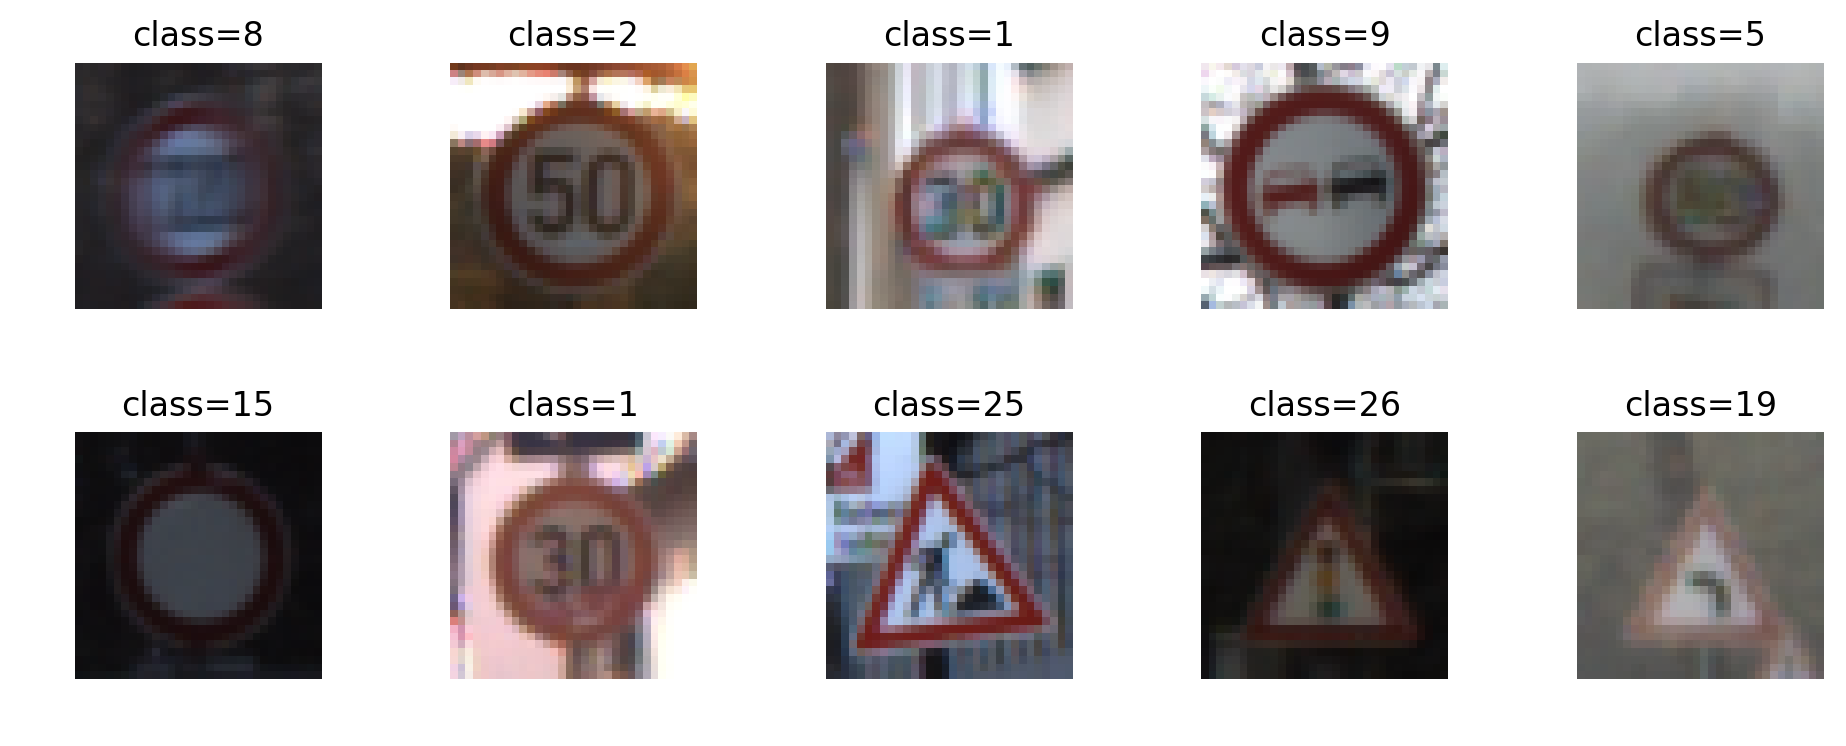

In [4]:
display_random_images(X_train, y_train)

In [5]:
def count_by_class(y_train):
    result = {}
    for cls in y_train:
        if cls not in result:
            result[cls] = 1
        else:
            result[cls] += 1
    return result

def group_by_class(y_train):
    """Returns {cls: [idx of items in x_train with class cls], ...}
    """
    result = {}
    for idx in range(len(y_train)):
        cls = y_train[idx]
        result.setdefault(cls, []).append(idx)
    return result

def plot_counts_by_class(y_train, title):
    counts = count_by_class(y_train)
    sorted_keys = sorted(counts.keys())
    sorted_values = [counts[k] for k in sorted_keys]

    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.bar(sorted_keys, sorted_values, width=0.75)
    ax.set_xticks(sorted_keys)
    ax.set_xlabel('Class')
    ax.set_title(title)
    plt.show()

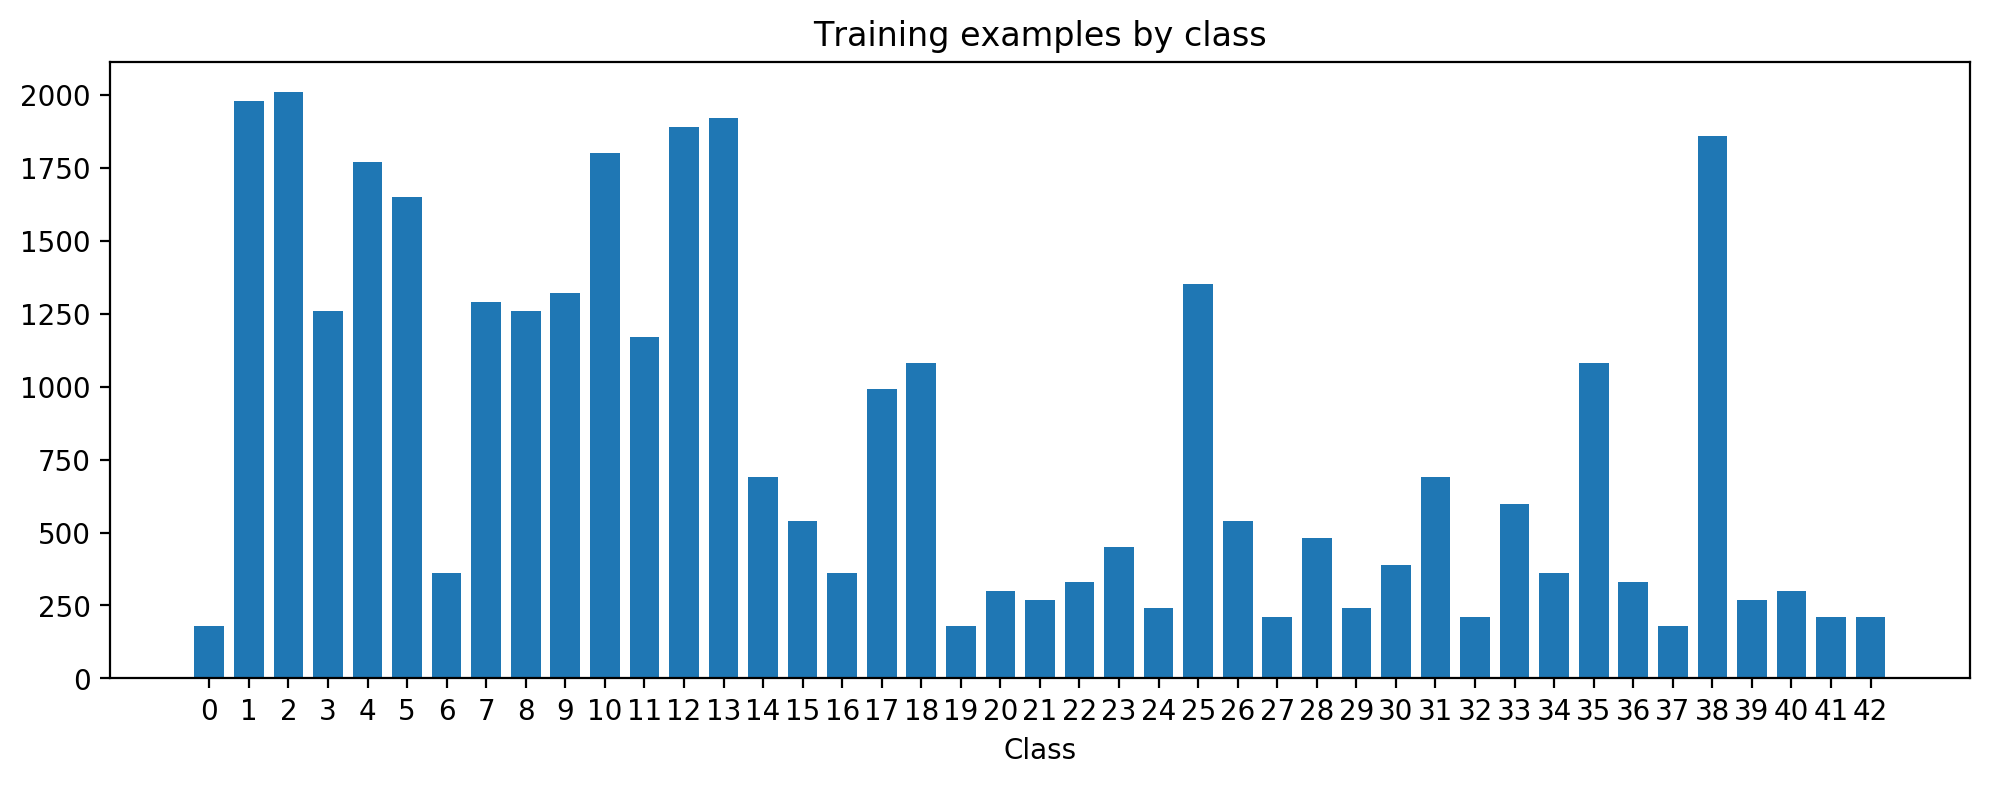

In [6]:
plot_counts_by_class(y_train, 'Training examples by class')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
import numpy as np
from skimage.color import rgb2grey


def greyscale(data):
    output_shape = list(data.shape)
    output_shape[3] = 1
    greyscaled = (rgb2grey(data) / 255.0).astype(np.float32)
    return greyscaled.reshape(output_shape)


import skimage.exposure


def equalize_hist(in_image):
    return skimage.exposure.equalize_adapthist(in_image.reshape(in_image.shape[0:2])).reshape(in_image.shape)


def equalize_hist_all(images):
    total = images.shape[0]
    for i in range(total):
        if total > 500 and i % 500 == 0:
            print("Processed {} out of {}".format(i, total))
        images[i] = equalize_hist(images[i])
        

def normalize_input_1(data):
    result = greyscale(data)
    equalize_hist_all(result)
    return result


def normalize_input_2(data):
    total = data.shape[0]
    result = np.empty_like(data, dtype=np.float32)
    for i in range(total):
        if total > 500 and i % 500 == 0:
            print("Processed {} out of {}".format(i, total))
        result[i] = skimage.exposure.equalize_adapthist(data[i])
    return result


def normalize_single_item_3(item):
    equalized = skimage.exposure.equalize_adapthist(item)
    return (equalized - 0.5) / 0.5


def normalize_single_item_3_inline(input, result, idx):
    result[idx] = normalize_single_item_3(input[idx])

    
def normalize_input_3(data):
    total = data.shape[0]
    result = np.empty_like(data, dtype=np.float32)
    for i in range(total):
        if total > 500 and i % 500 == 0:
            print("Processed {} out of {}".format(i, total))
        equalized = skimage.exposure.equalize_adapthist(data[i])
        result[i] = (equalized - 0.5) / 0.5
    return result


def normalize_input_3_parallel(data):
    import tempfile
    import os
    import gc
    
    from joblib import Parallel, delayed
    from joblib import load, dump
    
    result_dtype = np.float32
    temp_folder = tempfile.mkdtemp()

    try:
        data_filename = os.path.join(temp_folder, 'data.mmap')
        result_filename = os.path.join(temp_folder, 'result.mmap')
        if os.path.exists(data_filename):
            os.unlink(data_filename)
        if os.path.exists(result_filename):
            os.unlink(result_filename)
        
        result = np.memmap(result_filename, dtype=result_dtype, shape=data.shape, mode='w+')
    
        # Dump and reassign to gc.collect things in Parallel
        dump(data, data_filename)
        data = load(data_filename, mmap_mode='r')

        Parallel(n_jobs=-1, verbose=4)(
            delayed(normalize_single_item_3_inline)(data, result, idx)
            for idx in range(len(data))
        )
        
        result_copy = result.copy()
        
        gc.collect()
        
        return result_copy
    finally:
        try:
            import shutil
            shutil.rmtree(temp_folder)
        except Exception as e:
            print("Was not able to remove temp_folder={}, e={}".format(temp_folder, e))
    return None


# Select version
normalize_input = normalize_input_3_parallel

def normalize_input_3_inline(data, on_progress=print):
    total = data.shape[0]
    
    start_time = datetime.now()
    prev_time = start_time
    
    for dest_idx in range(total):
        curr_time = datetime.now()
        time_spent = curr_time - start_time
        if on_progress is not None and (curr_time - prev_time).total_seconds() > 10:
            rem_seconds = int(total * time_spent.total_seconds() / (dest_idx+1)) - int(time_spent.total_seconds())
            on_progress("Processed {} out of {}, remaining {:2}m {:2}s".format(
                dest_idx+1, total, int(rem_seconds / 60), rem_seconds % 60))
            prev_time = curr_time
            
        data[dest_idx] = skimage.exposure.equalize_adapthist(data[dest_idx])
    
    if on_progress is not None:
        on_progress("Done")
    
normalize_input_inline = normalize_input_3_inline

## Example images after preprocessing

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


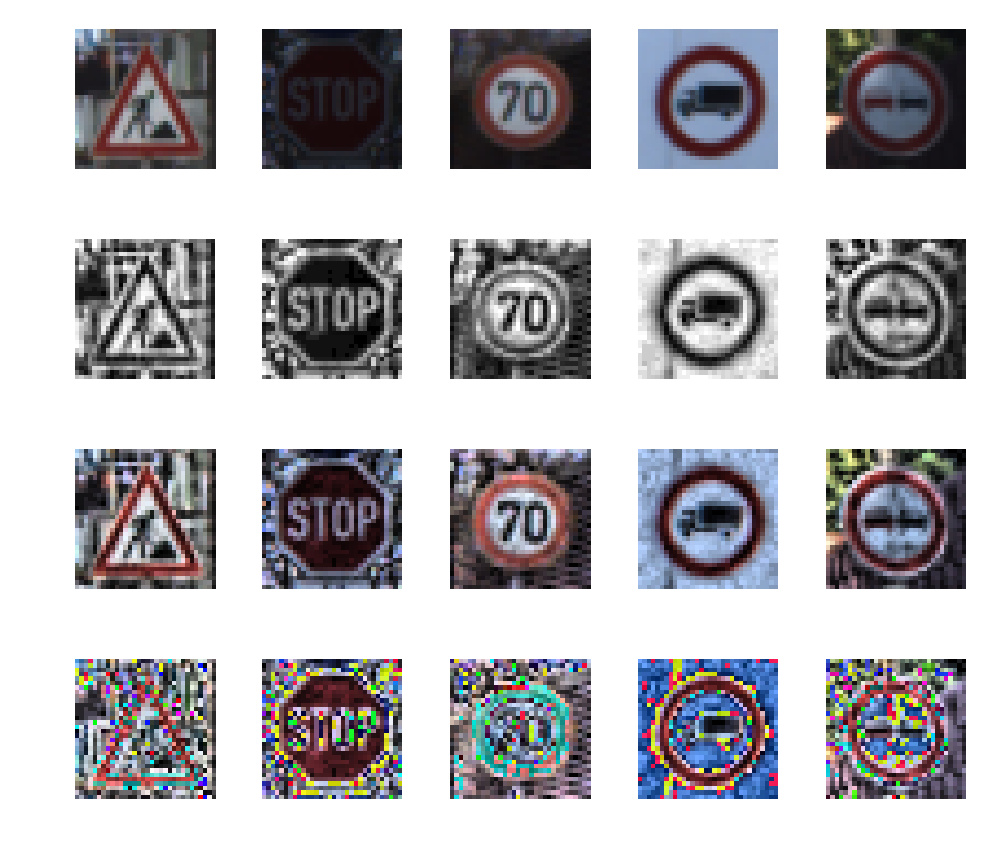

Input          var=2729.308719681634, max=255, min=8, mean=70.68079427083333
Preprocessed 1 var=0.07866732031106949, max=1.0, min=0.0, mean=0.45326584577560425
Preprocessed 2 var=0.06153304502367973, max=1.0, min=0.0, mean=0.3896231949329376
Preprocessed 3 var=0.24613218009471893, max=1.0, min=-1.0, mean=-0.22075361013412476


In [8]:
indices = np.random.randint(0, len(X_train), 5)
example_images = X_train[indices]
preprocessed_images_1 = normalize_input_1(example_images)
preprocessed_images_2 = normalize_input_2(example_images)
preprocessed_images_3 = normalize_input_3_parallel(example_images)
display_images(list(example_images) +\
               list(preprocessed_images_1) +\
               list(preprocessed_images_2) +\
               list(preprocessed_images_3),
               4, 5, figsize=(6, 5))
print("Input          var={}, max={}, min={}, mean={}".format(
    np.var(example_images), np.max(example_images), np.min(example_images), np.mean(example_images)))
print("Preprocessed 1 var={}, max={}, min={}, mean={}".format(
    np.var(preprocessed_images_1), np.max(preprocessed_images_1), np.min(preprocessed_images_1),
    np.mean(preprocessed_images_1)))
print("Preprocessed 2 var={}, max={}, min={}, mean={}".format(
    np.var(preprocessed_images_2), np.max(preprocessed_images_2), np.min(preprocessed_images_2),
    np.mean(preprocessed_images_2)))
print("Preprocessed 3 var={}, max={}, min={}, mean={}".format(
    np.var(preprocessed_images_3), np.max(preprocessed_images_3), np.min(preprocessed_images_3),
    np.mean(preprocessed_images_3)))

## Augmenting dataset

In [9]:
import skimage.util
import skimage.transform
import numpy as np
from datetime import datetime


def apply_projection_transform(img):
    assert img.shape[0] == img.shape[1]
    h = img.shape[0]
    w = img.shape[1]
    k = 0.2
    deltas_h = [np.random.uniform(-h*k, h*k) for i in range(4)]
    deltas_w = [np.random.uniform(-w*k, w*k) for i in range(4)]

    transform = skimage.transform.ProjectiveTransform()
    transform.estimate(np.array([
        (deltas_h[0], deltas_w[0]),
        (deltas_h[1], w - deltas_w[1]),
        (h - deltas_h[2], w - deltas_w[2]),
        (h - deltas_h[3], deltas_w[3])
    ]), np.array([
        (0, 0), (0, w), (h, w), (h, 0)
    ]))
    return skimage.transform.warp(img, transform, output_shape=(h, w), order=1, mode='edge')


def extend_dataset(x, y, y_dtype=np.uint8, on_progress=None):    
    manglers = [
        (1, lambda img: skimage.util.random_noise(img, 'gaussian', mean=0.1, var=0.002)),
        (1, lambda img: img),
        (1, lambda img: skimage.transform.rotate(img, np.random.randint(-20, 20))),
        (1, lambda img: skimage.transform.warp(img, skimage.transform.AffineTransform(
            scale=[1.0 + (np.random.random() * 0.2 - 0.1)]*2))),
        (1, lambda img: skimage.transform.warp(
            img, skimage.transform.AffineTransform(translation=np.random.randint(-4, 4)))),
        (4, lambda img: apply_projection_transform(img))
        # Other realistic perturbations would probably also increase robustness such as other affine transformations,
        # brightness, contrast and blur
    ]
    
    total = len(x) * (sum(cnt for cnt, _ in manglers) + 1)
    image_shape = x[0].shape

    addon_x = np.empty(shape=(total, ) + image_shape, dtype=np.float64)
    addon_y = np.empty(shape=(total, ), dtype=y_dtype)

    dest_idx = 0
    start_time = datetime.now()
    prev_time = start_time

    for img_idx in range(len(x)):
        src_image = x[img_idx]
        src_cls = y[img_idx]

        if src_image.dtype.kind != 'f':
            # Hack to accept uint8 and float type images as an input
            src_image = skimage.img_as_float(src_image)
            
        for count, mangler in manglers:
            for _ in range(count):
                res = mangler(src_image)
                assert res.dtype == addon_x.dtype,\
                    "Data types must match, got {} and {}".format(res.dtype, addon_x.dtype)
                addon_x[dest_idx] = res
                addon_y[dest_idx] = src_cls
                dest_idx += 1

        curr_time = datetime.now()
        time_spent = curr_time - start_time
        if on_progress is not None and (curr_time - prev_time).total_seconds() > 10:
            rem_seconds = int(total * time_spent.total_seconds() / (dest_idx+1)) - int(time_spent.total_seconds())
            on_progress("Processed {} out of {}, remaining {:2}m {:2}s".format(
                dest_idx+1, total, int(rem_seconds / 60), rem_seconds % 60))
            prev_time = curr_time

    if on_progress is not None:
        on_progress("Done")
    return addon_x, addon_y


def extend_dataset_to_max(x, y, y_dtype=np.uint8, on_progress=None):
    manglers = [
        (1, lambda img: skimage.util.random_noise(img, 'gaussian', mean=0.1, var=0.002)),
        (1, lambda img: skimage.transform.rotate(img, np.random.randint(-20, 20))),
        (1, lambda img: skimage.transform.warp(img, skimage.transform.AffineTransform(
            scale=[1.0 + (np.random.random() * 0.2 - 0.1)]*2))),
        (1, lambda img: skimage.transform.warp(
            img, skimage.transform.AffineTransform(translation=np.random.randint(-4, 4)))),
        (4, lambda img: apply_projection_transform(img))
        # Other realistic perturbations would probably also increase robustness such as other affine transformations,
        # brightness, contrast and blur
    ]

    indices_by_class = group_by_class(y)
    max_by_class = int(max(len(indices) for indices in indices_by_class.values()) * 1.5)
    
    total = max_by_class * len(indices_by_class.keys())
    image_shape = x[0].shape

    addon_x = np.empty(shape=(total, ) + image_shape, dtype=np.float64)
    addon_y = np.empty(shape=(total, ), dtype=y_dtype)

    dest_idx = 0
    start_time = datetime.now()
    prev_time = start_time

    for cls, indices in indices_by_class.items():
        if on_progress is not None:
            on_progress("Processing class {} extending {} to {}".format(cls, len(indices), max_by_class))

        for img_idx in indices:
            src_image = x[img_idx]
            src_cls = y[img_idx]
            if src_image.dtype.kind != 'f':
                # Hack to accept uint8 and float type images as an input
                src_image = skimage.img_as_float(src_image)

            addon_x[dest_idx] = src_image
            addon_y[dest_idx] = src_cls
            dest_idx += 1
            
        to_add = max_by_class - len(indices)
        mangler_idx = 0
        img_idx_idx = 0
        while to_add > 0:
            img_idx = indices[img_idx_idx]
            src_image = x[img_idx]
            src_cls = y[img_idx]

            if src_image.dtype.kind != 'f':
                # Hack to accept uint8 and float type images as an input
                src_image = skimage.img_as_float(src_image)

            mangler = manglers[mangler_idx][1]
            res = mangler(src_image)
            
            assert res.dtype == addon_x.dtype,\
                "Data types must match, got {} and {}".format(res.dtype, addon_x.dtype)
                
            addon_x[dest_idx] = res
            addon_y[dest_idx] = src_cls
            dest_idx += 1

            to_add -= 1
            mangler_idx = (mangler_idx + 1) % len(manglers)
            img_idx_idx = (img_idx_idx + 1) % len(indices)

            curr_time = datetime.now()
            time_spent = curr_time - start_time
            if on_progress is not None and (curr_time - prev_time).total_seconds() > 10:
                rem_seconds = int(total * time_spent.total_seconds() / (dest_idx+1)) - int(time_spent.total_seconds())
                on_progress("Processed {} out of {}, remaining {:2}m {:2}s".format(
                    dest_idx+1, total, int(rem_seconds / 60), rem_seconds % 60))
                prev_time = curr_time

    if on_progress is not None:
        on_progress("Done")
    return addon_x, addon_y

### Example of augmented images

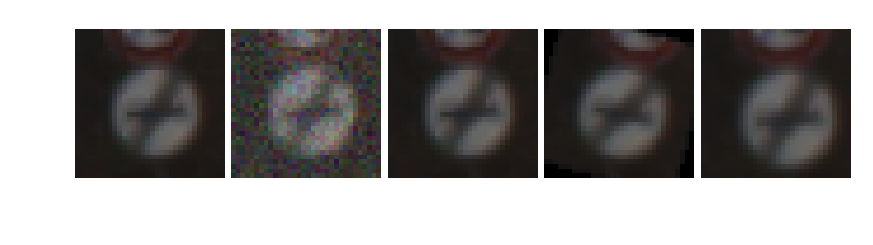

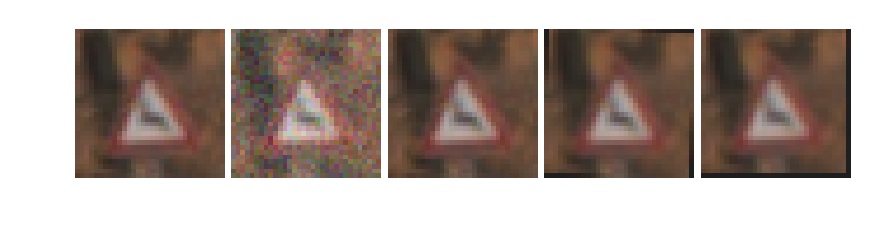

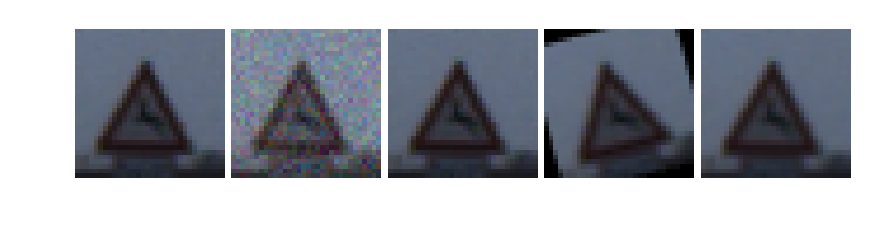

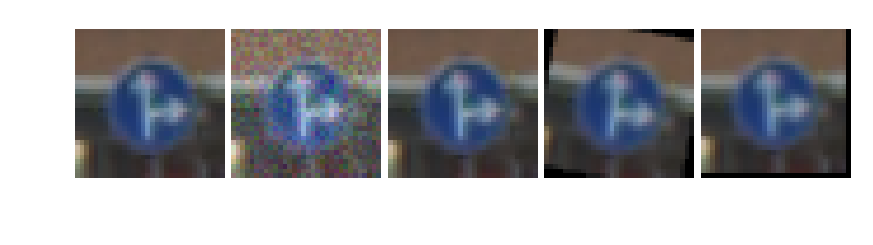

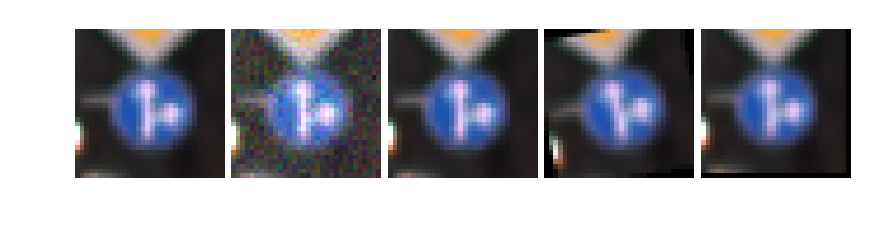

In [10]:
for i in range(5):
    idx = i * 300
    image = X_train[idx]
    mangled_images, mangled_images_y = extend_dataset([image], [y_train[idx]], y_dtype=np.uint8)
    display_images([image] + list(mangled_images), 1, 5, figsize=(5,1))

In [11]:
EXTEND_DATASET = True

if EXTEND_DATASET:
    X_train_extended, y_train_extended = extend_dataset_to_max(X_train, y_train, on_progress=print)
else:
    X_train_extended = X_train
    y_train_extended = y_train

Processing class 41 extending 210 to 3015
Processing class 31 extending 690 to 3015
Processing class 36 extending 330 to 3015
Processing class 26 extending 540 to 3015
Processing class 23 extending 450 to 3015
Processing class 1 extending 1980 to 3015
Processing class 40 extending 300 to 3015
Processing class 22 extending 330 to 3015
Processed 22648 out of 129645, remaining  0m 47s
Processing class 37 extending 180 to 3015
Processing class 16 extending 360 to 3015
Processing class 3 extending 1260 to 3015
Processing class 19 extending 180 to 3015
Processing class 4 extending 1770 to 3015
Processing class 11 extending 1170 to 3015
Processing class 42 extending 210 to 3015
Processing class 0 extending 180 to 3015
Processed 45721 out of 129645, remaining  0m 36s
Processing class 32 extending 210 to 3015
Processing class 27 extending 210 to 3015
Processing class 29 extending 240 to 3015
Processing class 24 extending 240 to 3015
Processing class 9 extending 1320 to 3015
Processing class 5 e

In [ ]:
display_random_images(X_train_extended, y_train_extended)
plot_counts_by_class(y_train_extended, 'Training examples by class - extended')

In [13]:
X_train_normalized = normalize_input(X_train_extended)
X_test_normalized = normalize_input(X_test)
X_valid_normalized = normalize_input(X_valid)
image_shape = X_train_normalized[0].shape

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/l

In [ ]:
all_datasets = {
    'train_extended': {'features': X_train_extended, 'labels': y_train_extended},
    'train_extended_normalized': {'features': X_train_normalized, 'labels': y_train_extended},
    'valid_normalized': {'features': X_valid_normalized, 'labels': y_valid},
    'test_normalized': {'features': X_test_normalized, 'labels': y_test}
}

In [ ]:
import os

data_directory = './data'
os.makedirs(os.path.dirname(data_directory), exist_ok=True)

def store_dataset(dataset_name, dataset):
    with open(os.path.join(data_directory, dataset_name + '.npz'), 'wb') as fh:
        np.savez(fh, features=dataset['features'], labels=dataset['labels'])

def load_dataset(dataset_name):
    with open(os.path.join(data_directory, dataset_name + '.npz'), 'rb') as fh:
        file = np.load(fh)
        return {'features': file['features'], 'labels': file['labels']}

In [ ]:
for dataset_name in all_datasets:
    store_dataset(dataset_name, all_datasets[dataset_name])
del all_datasets

In [14]:
dataset = load_dataset('train_extended_normalized')
X_train_extended, y_train_extended = dataset['features'], dataset['labels']

image_shape = X_train_extended[0].shape
n_classes = len(set(y_train_extended))

dataset = load_dataset('valid_normalized')
X_valid, y_valid = dataset['features'], dataset['labels']

dataset = load_dataset('test_normalized')
X_test, y_test = dataset['features'], dataset['labels']

del dataset

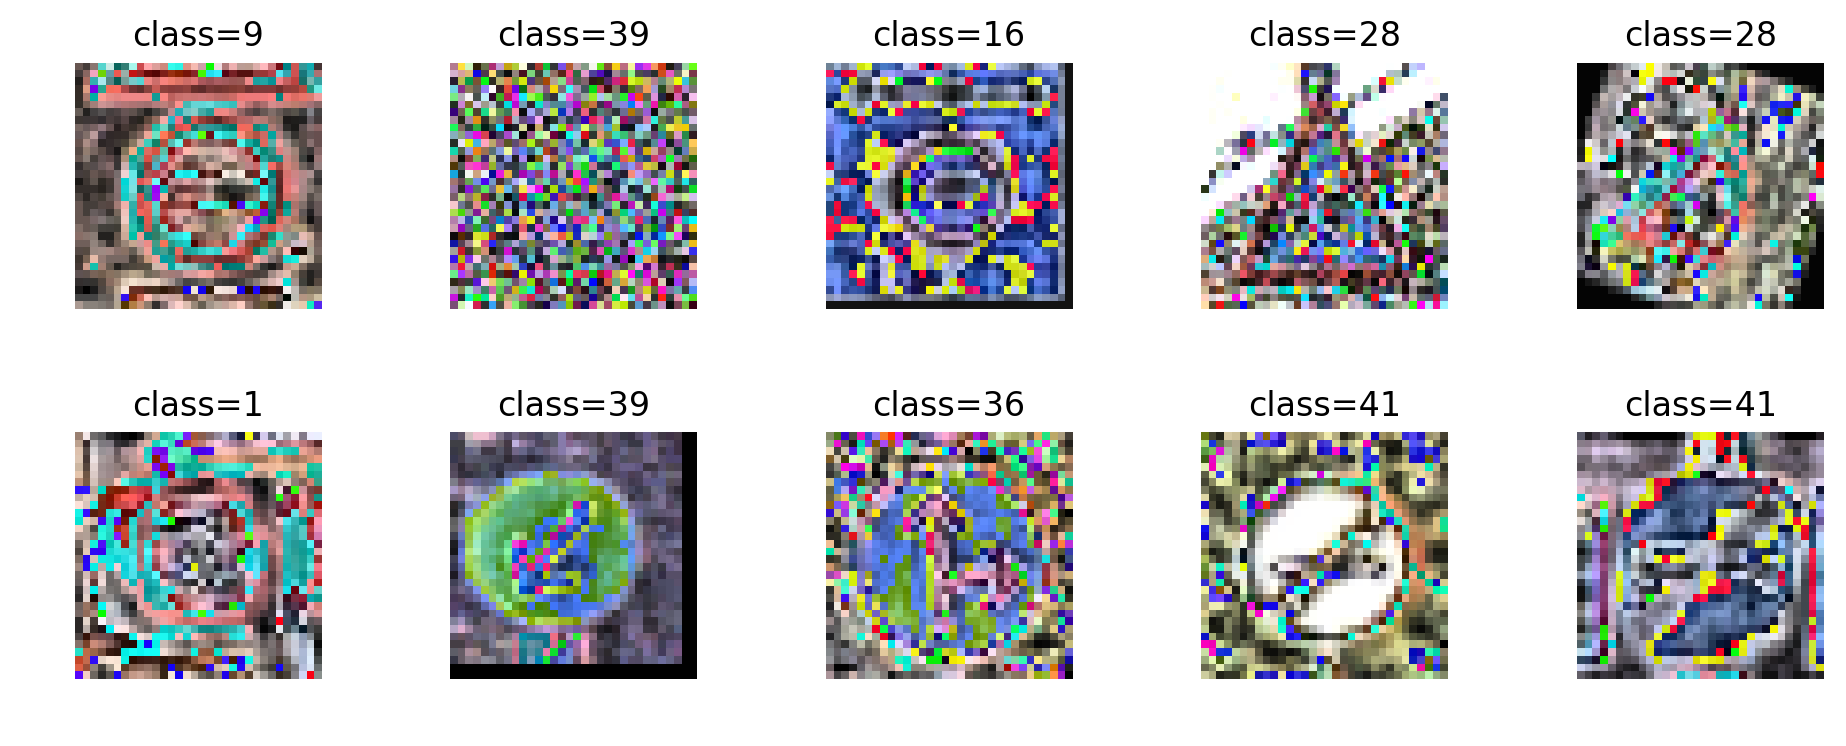

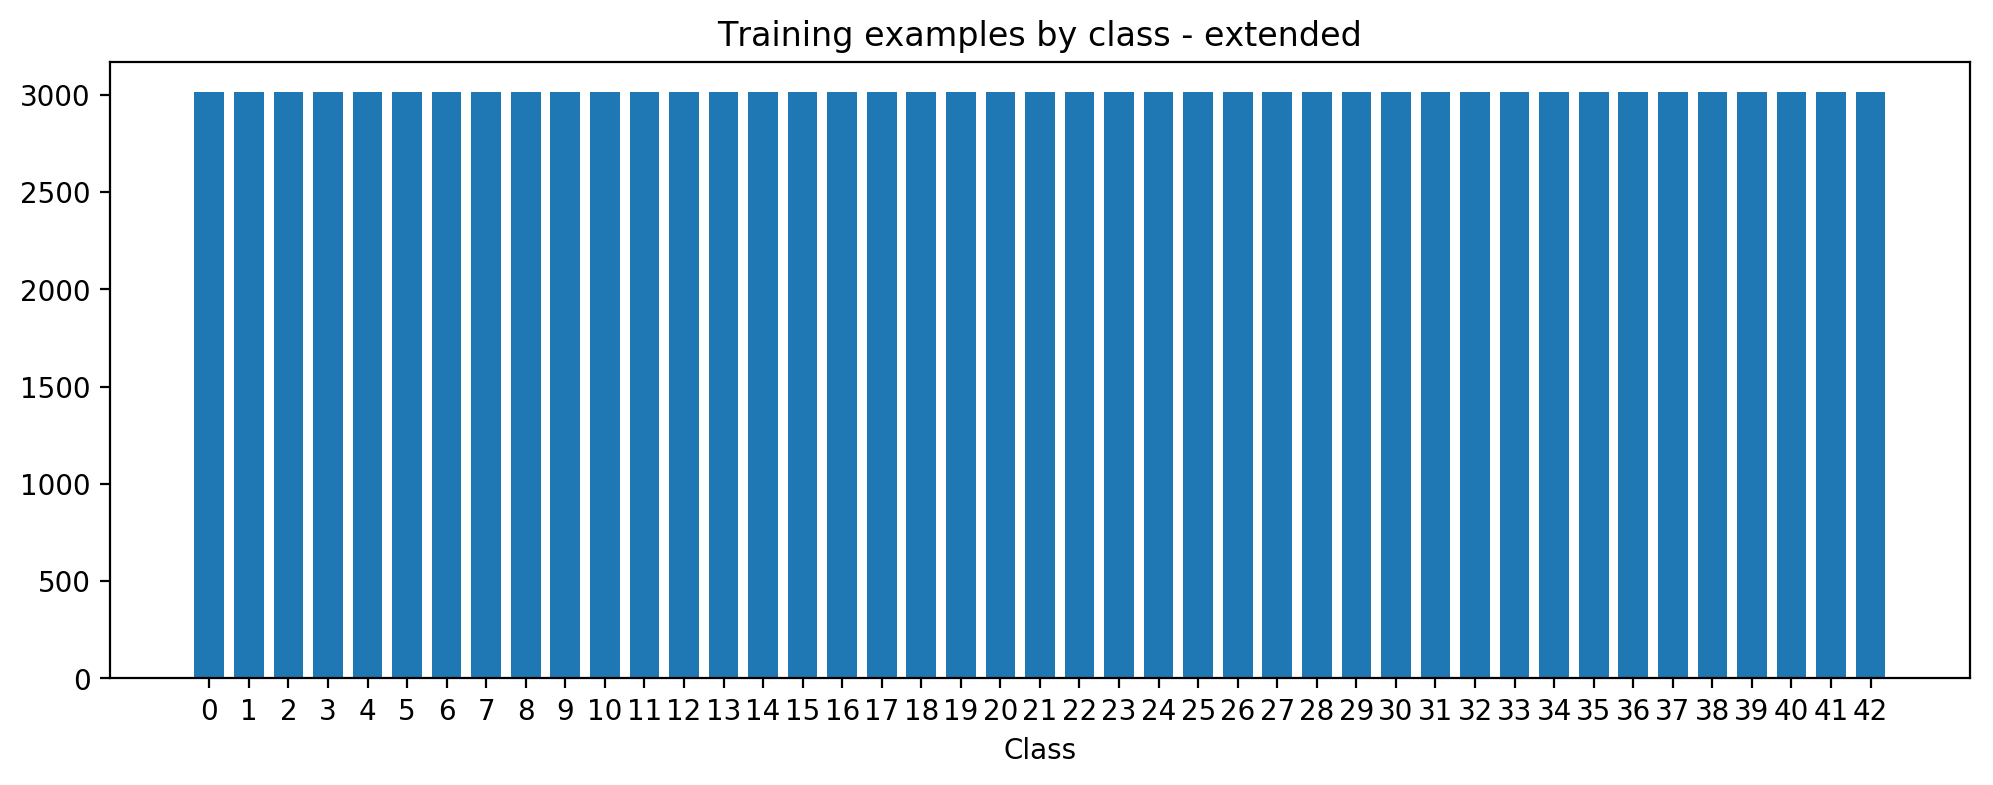

In [15]:
display_random_images(X_train_extended, y_train_extended)
plot_counts_by_class(y_train_extended, 'Training examples by class - extended')

In [16]:
from sklearn.utils import shuffle

X_train_extended, y_train_extended = shuffle(X_train_extended, y_train_extended)

### Model Architecture

In [17]:
import tensorflow as tf

class ChainBuilder(object):
    def __init__(self, mean=None, stddev=None):
        self._output = None
        self._input = None
        self._output_shape = None
        self._mean = mean
        self._stddev = stddev
        self._regularizers = []

    def input(self, input_data, input_shape):
        self._input = input_data
        self._output = input_data
        self._output_shape = input_shape
        return self

    def conv2d(self, filter_shape, strides, name, padding='SAME'):
        input_shape = self._output_shape
    
        if len(input_shape) < 3:
            input_depth = 1
        else:
            input_depth = input_shape[2]
            
        with tf.variable_scope(name):
            weights = tf.get_variable('weights',
                                      shape=(filter_shape[0], filter_shape[1], input_depth, filter_shape[2]))
        
            biases = tf.get_variable('biases',
                                     initializer=tf.zeros_initializer(),
                                     shape=filter_shape[2])
        
            self._output = tf.nn.conv2d(self._output, weights, strides=[1]+strides+[1], padding=padding) + biases
            self._output_shape = self._output.shape.as_list()[1:]
            #self._regularizers.append(tf.nn.l2_loss(weights))
        print("conv2d result: output_shape={}, output={}".format(self._output_shape, self._output))
        return self
    
    @property
    def output(self):
        return self._output
    
    @property
    def output_shape(self):
        return self._output_shape
    
    @property
    def regularizers(self):
        return self._regularizers
    
    def relu(self):
        self._output = tf.nn.relu(self._output)
        return self
    
    def max_pool(self, kernel, strides):
        assert len(self._output_shape) == 3
        self._output = tf.nn.max_pool(self._output,
                                      ksize=[1, kernel[0], kernel[1], 1],
                                      strides=[1]+strides+[1],
                                      padding='SAME')
        self._output_shape = self._output.shape.as_list()[1:]
        print("max_pool result: output_shape={}, output={}".format(self._output_shape, self._output))
        return self
    
    def flatten(self):
        assert len(self._output_shape) == 3
        self._output = tf.contrib.layers.flatten(self._output)
        self._output_shape = [self._output_shape[0] * self._output_shape[1] * self._output_shape[2]]
        print("flatten result: output_shape={}, output={}".format(self._output_shape, self._output))
        return self
    
    def dropout(self, keep_prob):
        self._output = tf.nn.dropout(self._output, keep_prob)
        return self
    
    def concat(self, what):
        self._output = tf.concat([self._output] + what, 1)
        self._output_shape = [self._output.shape.as_list()[1]]
        return self
    
    def fc(self, output_n, name):
        assert len(self._output_shape) == 1
        #print("Creating fc({}, {}, {})".format(self._output_shape, output_n, self._output))

        with tf.variable_scope(name):
            weights = tf.get_variable('weights',
                                     shape=(self._output_shape[0], output_n))
            biases = tf.get_variable('biases',
                                     initializer=tf.zeros_initializer(),
                                     shape=(output_n,))
            self._regularizers.append(tf.nn.l2_loss(weights))
        
        fc = tf.matmul(self._output, weights) + biases
        self._output = fc
        self._output_shape = [output_n]
        return self

In [18]:
# Standard LeNet architecture
def create_model_lenet(input_data, n_classes, keep_prob):
    with tf.variable_scope('lenet', initializer=tf.contrib.layers.xavier_initializer()):
        builder = ChainBuilder()
        builder.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 6], [1, 1], 'conv_1', 'VALID').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0]).\
            conv2d([5, 5, 16], [1, 1], 'conv_2', 'VALID').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1]).\
            flatten().\
            fc(400, 'fc_1').relu().\
            dropout(keep_prob[2]).\
            fc(100, 'fc_2').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_3')
    return builder.output, builder.regularizers

In [19]:
# Multiscale
def create_model_ms10(input_data, n_classes, keep_prob):
    with tf.variable_scope('ms10', initializer=tf.contrib.layers.xavier_initializer()):
        builder1 = ChainBuilder()
        builder1.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 32], [1, 1], 'conv_1').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0])
        builder2 = ChainBuilder()
        builder2.input(builder1.output, builder1.output_shape).\
            conv2d([5, 5, 128], [1, 1], 'conv_2').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1]).\
            flatten().\
            concat([builder1.max_pool([2, 2], [2, 2]).flatten().output]).\
            fc(400, 'fc_1').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_2')
    return builder2.output, builder2.regularizers

In [20]:
# Multiscale
def create_model_ms10_1(input_data, n_classes, keep_prob):
    with tf.variable_scope('ms10_1', initializer=tf.contrib.layers.xavier_initializer()):
        builder1 = ChainBuilder()
        builder1.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 128], [1, 1], 'conv_1').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0])
        builder2 = ChainBuilder()
        builder2.input(builder1.output, builder1.output_shape).\
            conv2d([5, 5, 128], [1, 1], 'conv_2').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1]).\
            flatten().\
            concat([builder1.max_pool([2, 2], [2, 2]).flatten().output]).\
            fc(400, 'fc_1').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_2')
    return builder2.output, builder2.regularizers

In [21]:
# Multiscale
def create_model_ms10_2(input_data, n_classes, keep_prob):
    with tf.variable_scope('ms10_2', initializer=tf.contrib.layers.xavier_initializer()):
        builder1 = ChainBuilder()
        builder1.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 32], [1, 1], 'conv_1').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0])
        builder2 = ChainBuilder()
        builder2.input(builder1.output, builder1.output_shape).\
            conv2d([5, 5, 128], [1, 1], 'conv_2').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1]).\
            flatten().\
            concat([builder1.max_pool([2, 2], [2, 2]).flatten().output]).\
            fc(200, 'fc_1').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_2')
    return builder2.output, builder2.regularizers

In [22]:
# Multiscale
def create_model_ms10_3(input_data, n_classes, keep_prob):
    with tf.variable_scope('ms10_3', initializer=tf.contrib.layers.xavier_initializer()):
        builder1 = ChainBuilder()
        builder1.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 32], [1, 1], 'conv_1').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0])
        builder2 = ChainBuilder()
        builder2.input(builder1.output, builder1.output_shape).\
            conv2d([5, 5, 64], [1, 1], 'conv_2').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1]).\
            flatten().\
            concat([builder1.max_pool([2, 2], [2, 2]).flatten().output]).\
            fc(400, 'fc_1').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_2')
    return builder2.output, builder2.regularizers

In [23]:
# Multiscale
def create_model_ms10_4(input_data, n_classes, keep_prob):
    with tf.variable_scope('ms10_4', initializer=tf.contrib.layers.xavier_initializer()):
        builder1 = ChainBuilder()
        builder1.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 32], [1, 1], 'conv_1').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0])
        builder2 = ChainBuilder()
        builder2.input(builder1.output, builder1.output_shape).\
            conv2d([5, 5, 64], [1, 1], 'conv_2').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1]).\
            flatten().\
            concat([builder1.max_pool([2, 2], [2, 2]).flatten().output]).\
            fc(200, 'fc_1').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_2')
    return builder2.output, builder2.regularizers

In [24]:
# Multiscale
def create_model_ms11(input_data, n_classes, keep_prob):
    with tf.variable_scope('ms11', initializer=tf.contrib.layers.xavier_initializer()):
        builder1 = ChainBuilder()
        builder1.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 32], [1, 1], 'conv_1').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0])
        builder2 = ChainBuilder()
        builder2.input(builder1.output, builder1.output_shape).\
            conv2d([5, 5, 64], [1, 1], 'conv_2').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1])
        builder3 = ChainBuilder()
        builder3.input(builder2.output, builder2.output_shape).\
            conv2d([5, 5, 128], [1, 1], 'conv_3').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[2]).\
            flatten().\
            concat([builder1.max_pool([4, 4], [4, 4]).flatten().output,
                    builder2.max_pool([2, 2], [2, 2]).flatten().output]).\
            fc(400, 'fc_1').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_2')
    return builder3.output, builder3.regularizers

In [25]:
# Multiscale
def create_model_ms12(input_data, n_classes, keep_prob):
    with tf.variable_scope('ms12', initializer=tf.contrib.layers.xavier_initializer()):
        builder1 = ChainBuilder()
        builder1.input(input_data, input_data[0].shape.as_list()[0:3]).\
            conv2d([5, 5, 32], [1, 1], 'conv_1').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[0])
        builder2 = ChainBuilder()
        builder2.input(builder1.output, builder1.output_shape).\
            conv2d([5, 5, 64], [1, 1], 'conv_2').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[1])
        builder3 = ChainBuilder()
        builder3.input(builder2.output, builder2.output_shape).\
            conv2d([5, 5, 128], [1, 1], 'conv_3').relu().\
            max_pool([2, 2], [2, 2]).\
            dropout(keep_prob[2]).\
            flatten().\
            concat([builder1.max_pool([4, 4], [4, 4]).flatten().output,
                    builder2.max_pool([2, 2], [2, 2]).flatten().output]).\
            fc(200, 'fc_1').relu().\
            dropout(keep_prob[3]).\
            fc(n_classes, 'fc_2')
    return builder3.output, builder3.regularizers

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [26]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

EPOCHS = 300
BATCH_SIZE = 128
learning_rate = 0.001
INPUT_KEEP_PROB = [0.9, 0.9, 0.9, 0.5]
L2_lambda = 0.001
PATIENCE_EPOCHS = 40

#state_file = './lenet_state/model'
#create_model = create_model_lenet
#state_file = './ms10_state/model'
#create_model = create_model_ms10
#state_file = './ms12_state/model'
#namespace = "ms12"
#create_model = create_model_ms12

#state_file = './ms10_state/model'
#namespace = "ms10"
#create_model = create_model_ms10

#state_file = './ms10_2_state/model'
#namespace = "ms10_2"
#create_model = create_model_ms10_2

#state_file = './ms10_3_state/model'
#namespace = "ms10_3"
#create_model = create_model_ms10_3

#state_file = './ms10_4_state/model'
#namespace = "ms10_4"
#create_model = create_model_ms10_4

#state_file = './ms10_4.1_state/model'
#namespace = "ms10_4.1"
#create_model = create_model_ms10_4

state_file = './ms10_1.3_state/model'
namespace = "ms10_1"
create_model = create_model_ms10_1

#state_file = './lenet.2_state/model'
#namespace = "lenet.2"
#create_model = create_model_lenet

state_file_best = state_file + ".best"

In [27]:
os.makedirs(os.path.dirname(state_file), exist_ok=True)
tf.reset_default_graph()

image_shape = X_train_extended[0].shape
n_classes = len(set(y_train_extended))
input_x = tf.placeholder(tf.float32, [None] + list(image_shape))
input_y = tf.placeholder(tf.int32, (None, ))

output_one_hot_y = tf.one_hot(input_y, n_classes)
keep_prob = tf.placeholder(tf.float32, shape=(4,), name='keep_prob')
logits, regularizers = create_model(input_x, n_classes, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=output_one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + L2_lambda * sum(regularizers)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(output_one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={input_x: batch_x, input_y: batch_y,
                                                           keep_prob: [1.0] * keep_prob.shape[0]})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

conv2d result: output_shape=[32, 32, 128], output=Tensor("ms10_1/conv_1/add:0", shape=(?, 32, 32, 128), dtype=float32)
max_pool result: output_shape=[16, 16, 128], output=Tensor("ms10_1/MaxPool:0", shape=(?, 16, 16, 128), dtype=float32)
conv2d result: output_shape=[16, 16, 128], output=Tensor("ms10_1/conv_2/add:0", shape=(?, 16, 16, 128), dtype=float32)
max_pool result: output_shape=[8, 8, 128], output=Tensor("ms10_1/MaxPool_1:0", shape=(?, 8, 8, 128), dtype=float32)
flatten result: output_shape=[8192], output=Tensor("ms10_1/Flatten/Reshape:0", shape=(?, 8192), dtype=float32)
max_pool result: output_shape=[8, 8, 128], output=Tensor("ms10_1/MaxPool_2:0", shape=(?, 8, 8, 128), dtype=float32)
flatten result: output_shape=[8192], output=Tensor("ms10_1/Flatten_1/Reshape:0", shape=(?, 8192), dtype=float32)


In [28]:
import numpy as np


def store_history(state_file, train_accuracy, validation_accuracy):
    path = os.path.join(os.path.dirname(state_file), 'history.npz')
    with open(path, 'wb') as fh:
        np.savez(fh, train_accuracy=train_accuracy, validation_accuracy=validation_accuracy)

        
def load_history(state_file):
    path = os.path.join(os.path.dirname(state_file), 'history.npz')
    with open(path, 'rb') as fh:
        file = np.load(fh)
        return file['train_accuracy'].tolist(), file['validation_accuracy'].tolist()

In [29]:
def train_the_model(X_train, y_train, X_valid, y_valid, batch_size, epochs, input_keep_prob,
                    continue_training=False,
                    state_file=None,
                    patience_epochs=10):
    %matplotlib notebook
    plt.rcdefaults()
    #matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
    #fig = plt.figure(figsize=(3.0, 3.0), dpi=255)
    #fig = plt.figure(dpi=255)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_xlim(0, epochs)
    ax.set_ylim(0.9, 1.0)
    ax.set_yscale('log')
    fig.show()
    fig.canvas.draw()
    
    def plot_points(points_list, colors):
        ax.clear()
        #ax.set_xlim(0, epochs)
        #ax.set_yscale('log')
        #ax.set_xscale('linear')
        plt.grid()
        for points, color in zip(points_list, colors):
            ax.plot(points, color=color, linewidth=2)
        fig.canvas.draw()
    
    def print_progress(epoch, train_accuracy, validation_accuracy, is_best):
        print("EPOCH {:3}, Train Accuracy = {:.5f}, Validation Accuracy = {:.5f}{}".format(
                epoch+1,
                train_accuracy,
                validation_accuracy, "<-- best so far" if is_best else ""))
    
    saver = tf.train.Saver()
    
    train_accuracy_hist = []
    validation_accuracy_hist = []
    
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        epoch_start = 0
        best_validation_accuracy = 0
        best_validation_accuracy_epoch = 0
        
        if continue_training:
            print("Loading training data...")

            saver.restore(sess, state_file)
            train_accuracy_hist, validation_accuracy_hist = load_history(state_file)
            epoch_start = len(train_accuracy_hist)
            
            for i in range(len(validation_accuracy_hist)):
                if validation_accuracy_hist[i] > best_validation_accuracy:
                    best_validation_accuracy_epoch = i
                    best_validation_accuracy = validation_accuracy_hist[i]
            
            for i in range(len(train_accuracy_hist)):
                print_progress(i, train_accuracy_hist[i], validation_accuracy_hist[i],
                               is_best=(i == best_validation_accuracy_epoch))
            
            plot_points([train_accuracy_hist, validation_accuracy_hist], ['r', 'b'])
            
            print("Loaded best epoch {}, Validation Accuracy = {:.5f}".format(
                best_validation_accuracy_epoch+1, best_validation_accuracy))
            print("Continuing training...")
                
        else:
            print("Starting training...")
            
        for i in range(epoch_start, epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={input_x: batch_x, input_y: batch_y,
                                                        keep_prob: input_keep_prob})
                
            train_accuracy = evaluate(X_train, y_train, batch_size)
            validation_accuracy = evaluate(X_valid, y_valid, batch_size)

            train_accuracy_hist.append(train_accuracy)
            validation_accuracy_hist.append(validation_accuracy)
            
            if validation_accuracy > best_validation_accuracy:
                best_validation_accuracy = validation_accuracy
                best_validation_accuracy_epoch = i
                saver.save(sess, state_file + ".best")
                
            print_progress(i, train_accuracy, validation_accuracy, is_best=(best_validation_accuracy_epoch == i))
            plot_points([train_accuracy_hist, validation_accuracy_hist], ['r', 'b'])
            saver.save(sess, state_file)
            store_history(state_file, train_accuracy_hist, validation_accuracy_hist)
            
            if i - best_validation_accuracy_epoch > patience_epochs:
                print("Stopping early - lost patience")
                break

        print("Best model stored in {}".format(state_file_best))
        print("... EPOCH {:3}, Validation Accuracy = {:.5f}".format(best_validation_accuracy_epoch,
                                                                    best_validation_accuracy))

#### Training the model

In [ ]:
continue_training = True

<IPython.core.display.Javascript object>


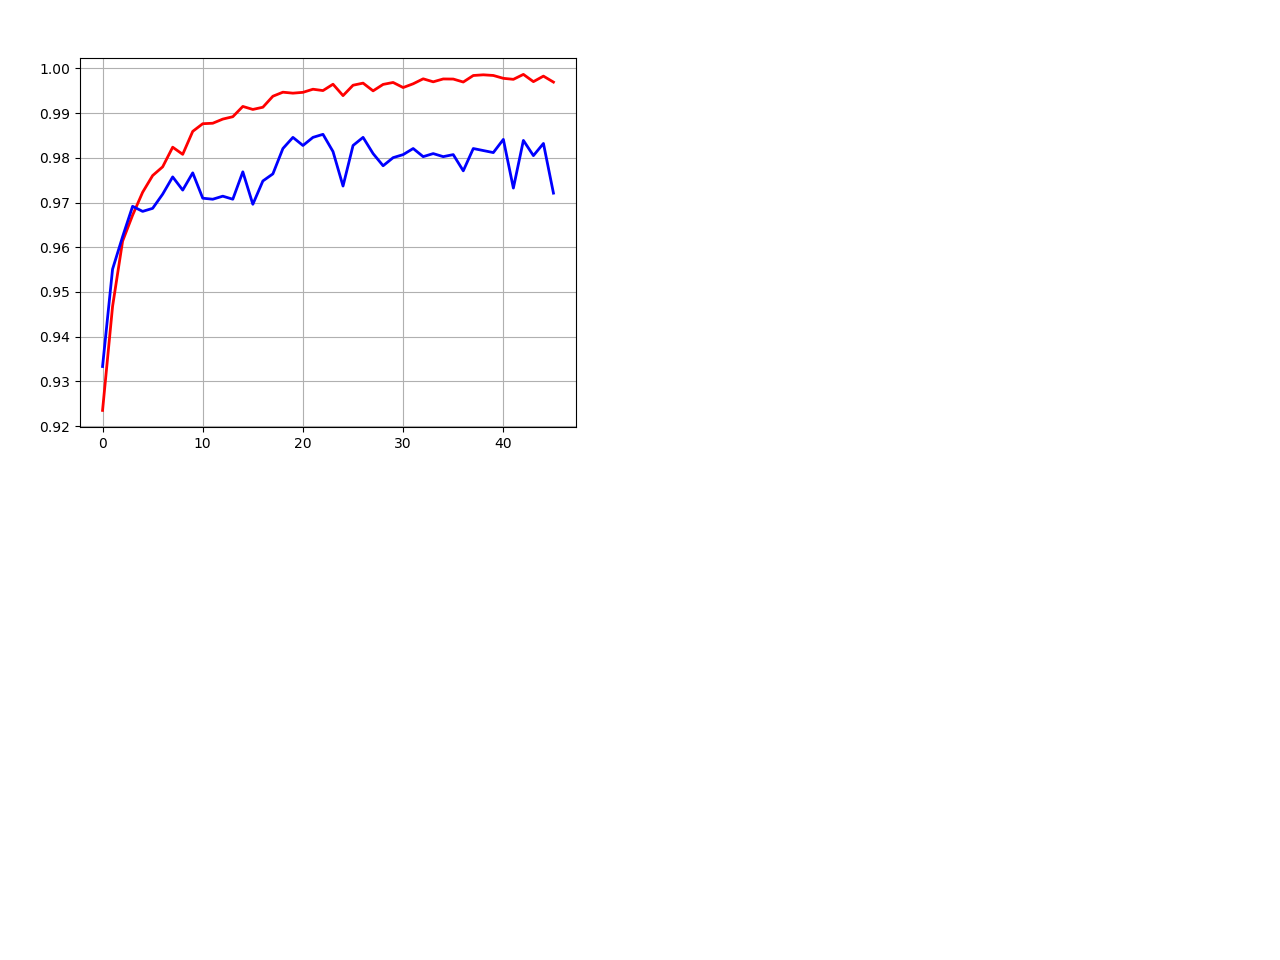

Loading training data...
EPOCH   1, Train Accuracy = 0.92351, Validation Accuracy = 0.93333
EPOCH   2, Train Accuracy = 0.94677, Validation Accuracy = 0.95510
EPOCH   3, Train Accuracy = 0.96136, Validation Accuracy = 0.96236
EPOCH   4, Train Accuracy = 0.96718, Validation Accuracy = 0.96916<-- best so far
EPOCH   5, Train Accuracy = 0.97230, Validation Accuracy = 0.96803
Loaded best epoch 4, Validation Accuracy = 0.96916
Continuing training...
EPOCH   6, Train Accuracy = 0.97604, Validation Accuracy = 0.96871
EPOCH   7, Train Accuracy = 0.97799, Validation Accuracy = 0.97188<-- best so far
EPOCH   8, Train Accuracy = 0.98238, Validation Accuracy = 0.97574<-- best so far
EPOCH   9, Train Accuracy = 0.98079, Validation Accuracy = 0.97279
EPOCH  10, Train Accuracy = 0.98592, Validation Accuracy = 0.97664<-- best so far
EPOCH  11, Train Accuracy = 0.98764, Validation Accuracy = 0.97098
EPOCH  12, Train Accuracy = 0.98774, Validation Accuracy = 0.97075
EPOCH  13, Train Accuracy = 0.98867, 

In [ ]:
train_the_model(X_train_extended, y_train_extended, X_valid, y_valid, BATCH_SIZE, EPOCHS, INPUT_KEEP_PROB,
                continue_training=continue_training, state_file=state_file, patience_epochs=PATIENCE_EPOCHS)

#### Test accuracy

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, state_file_best)
    test_accuracy = evaluate(X_test, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

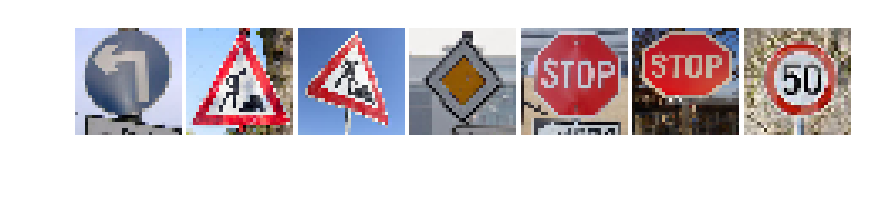

In [102]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

%matplotlib inline

import skimage.io
import skimage.transform
import os

images_dir = './web_images'
images = []
classes = []
for cls_id in os.listdir(images_dir):
    cls_dir = os.path.join(images_dir, cls_id)
    if os.path.isdir(cls_dir):
        for fname in os.listdir(cls_dir):
            if fname.endswith(('.jpg', '.png')):
                images.append(skimage.io.imread(os.path.join(cls_dir, fname)))
                classes.append(int(cls_id))
        

resized = [
    skimage.transform.resize(img, (image_shape[0], image_shape[1]))
    for img in images
]

display_images(resized, 1, len(resized), figsize=(5, 1))

### Predict the Sign Type for Each Image

In [103]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

X_web_orig = np.asarray(resized)
X_web = normalize_input(X_web_orig)
y_web = np.asarray(classes)

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, state_file_best)

    result = sess.run(tf.argmax(logits, 1), feed_dict={input_x: X_web, input_y: y_web,
                                                       keep_prob: [1.0] * keep_prob.shape[0]})

    print("Result   = {}".format(result))
    print("Expected = {}".format(y_web))
    print()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/ubuntu/miniconda3/l

Result   = [34 25 25 12 14 14  2]
Expected = [34 25 25 12 14 14  2]



### Analyze Performance

In [104]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, state_file_best)
    validation_accuracy = evaluate(X_web, y_web, BATCH_SIZE)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Validation Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

##### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

In [105]:
top_n = 5

with tf.Session() as sess:
    saver.restore(sess, state_file_best)
    result = sess.run(tf.nn.top_k(logits, top_n), feed_dict={input_x: X_web, input_y: y_web,
                                                             keep_prob: [1.0] * keep_prob.shape[0]})

In [106]:
import pandas as pd
signnames_df = pd.read_csv('./signnames.csv')

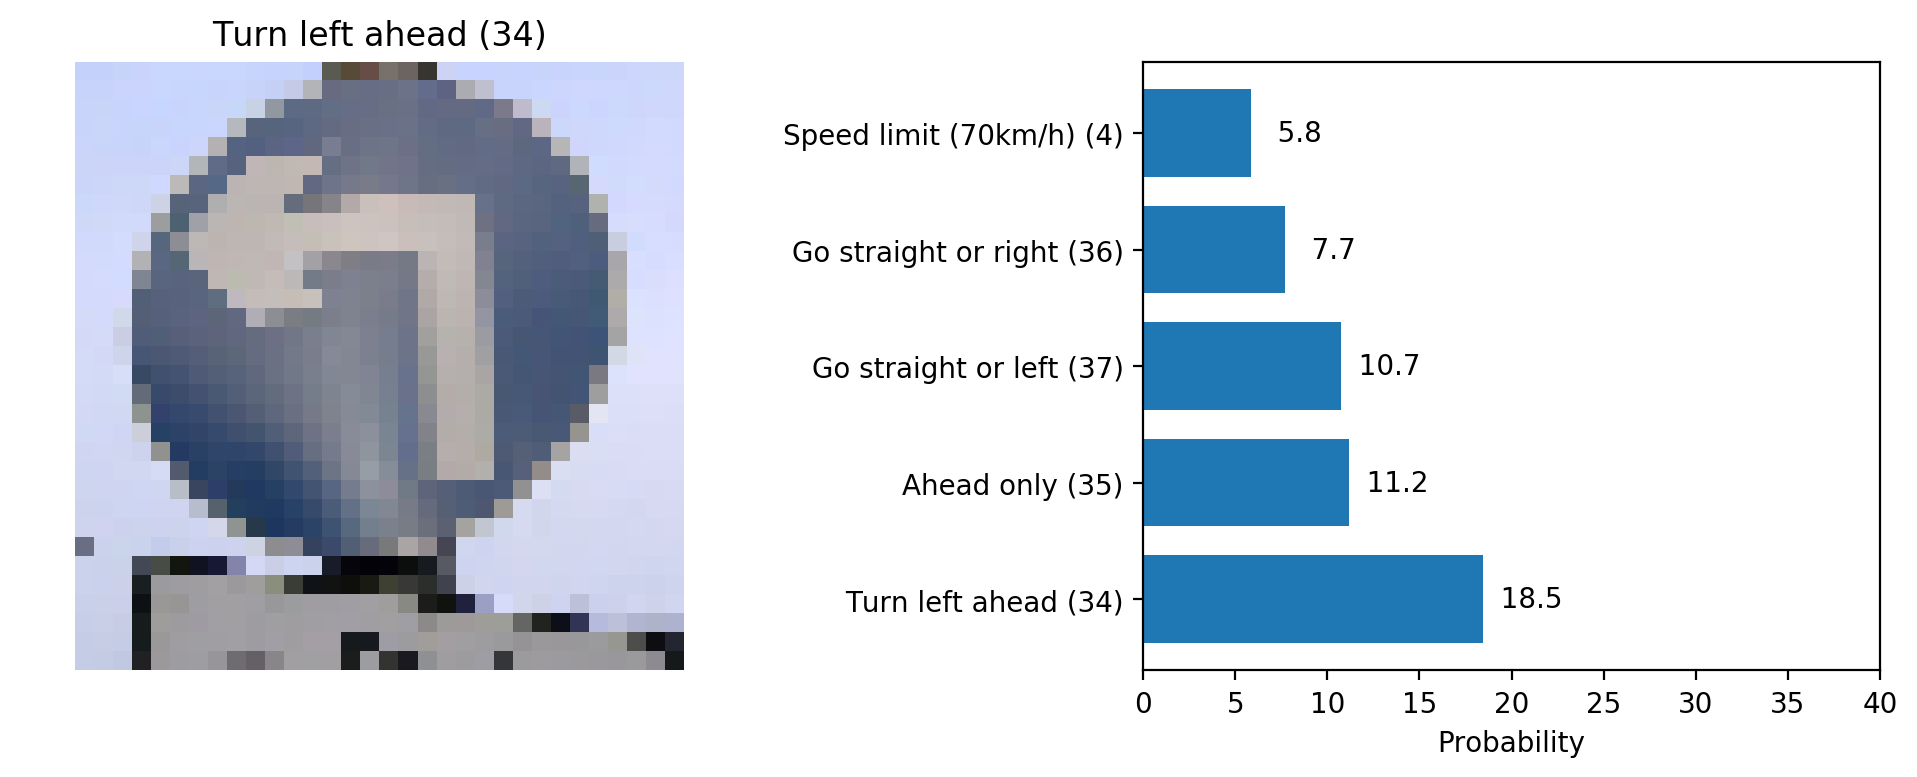

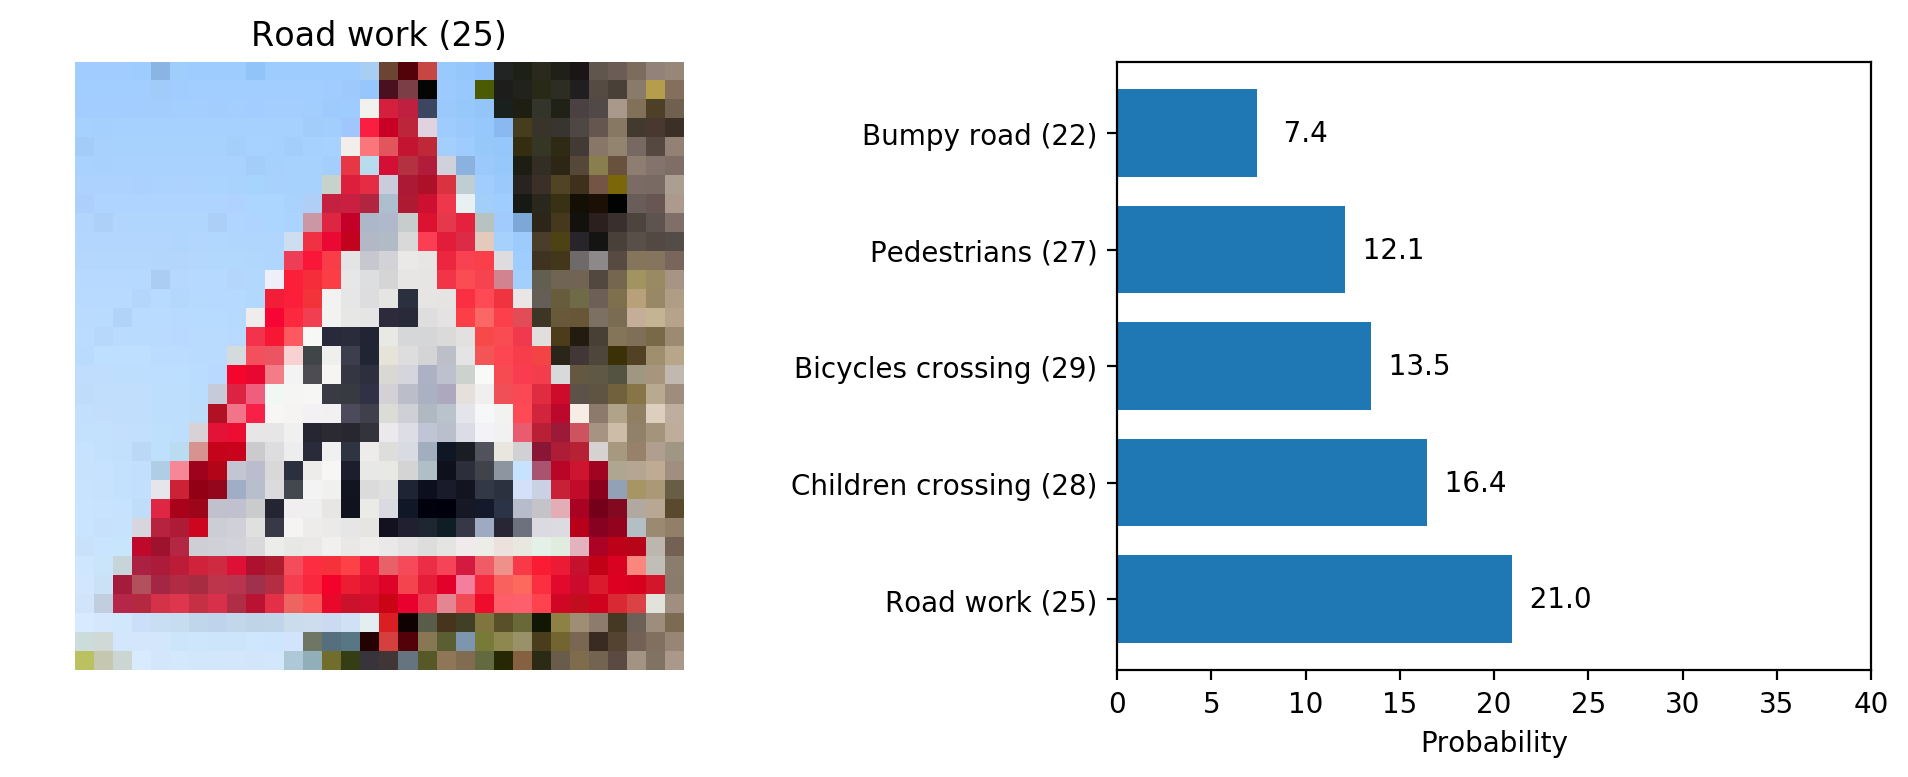

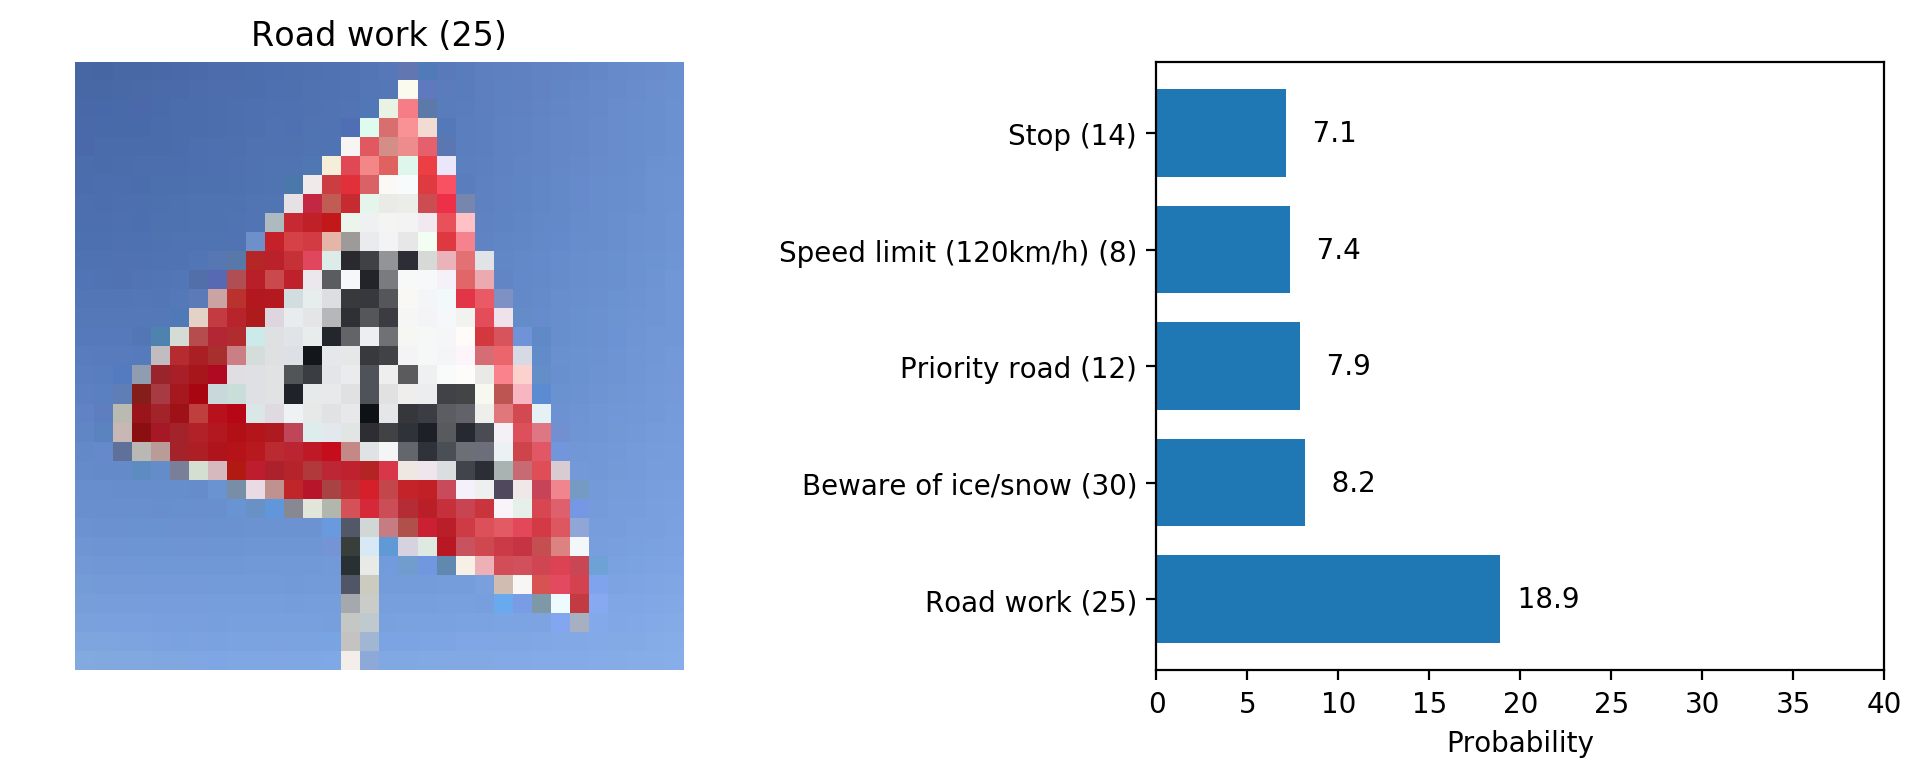

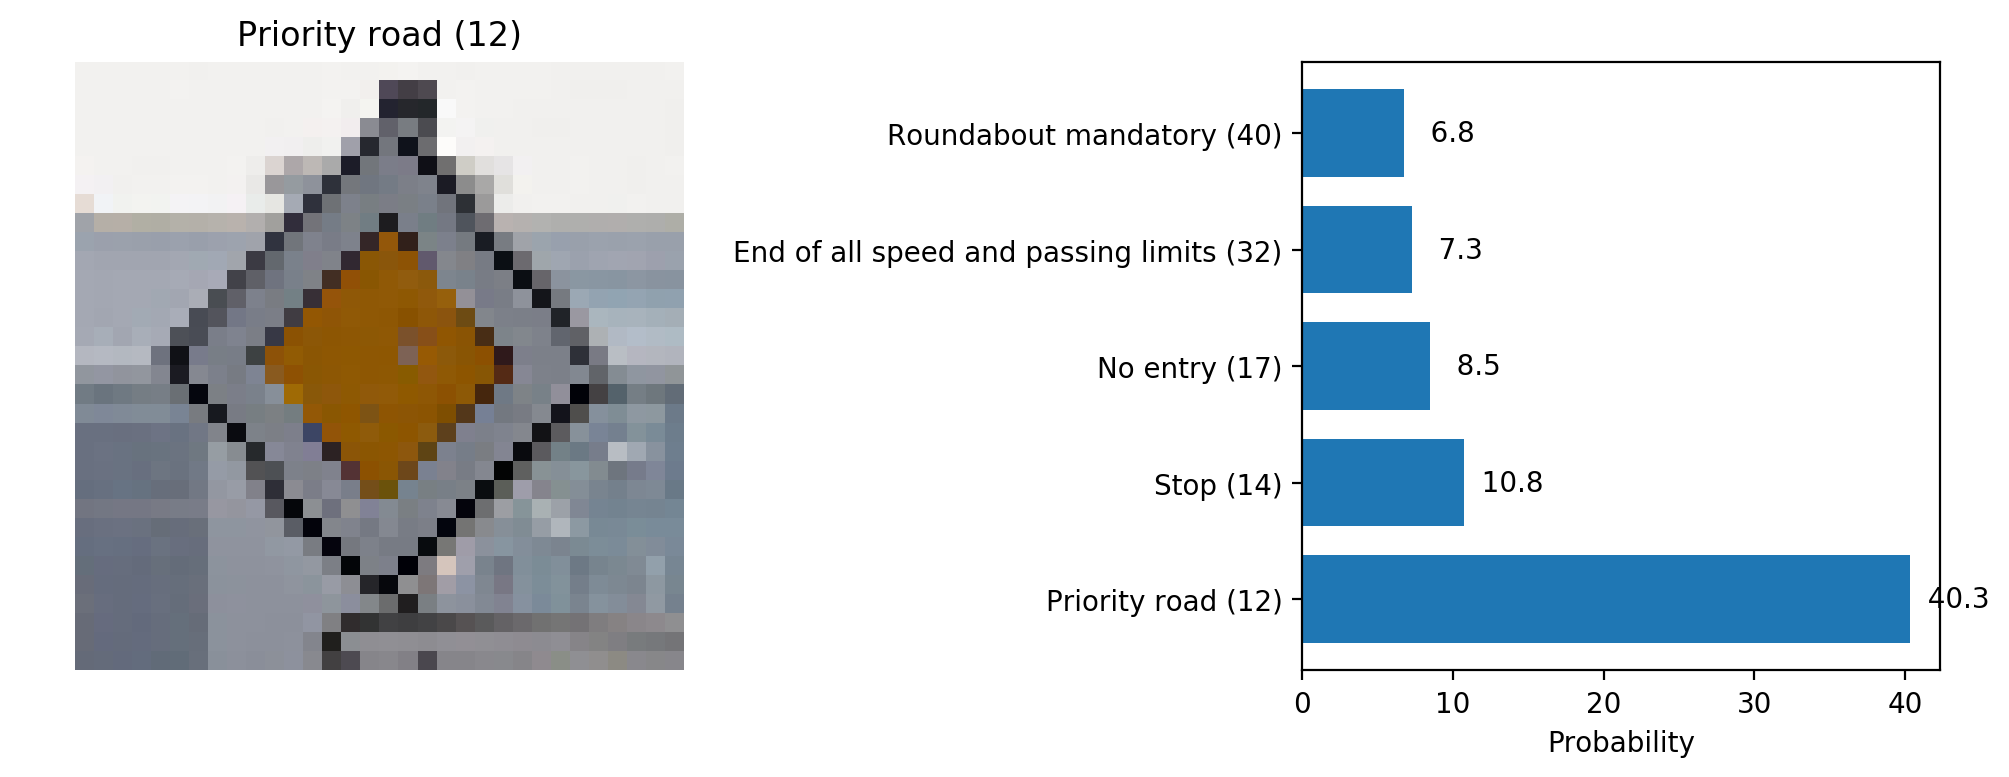

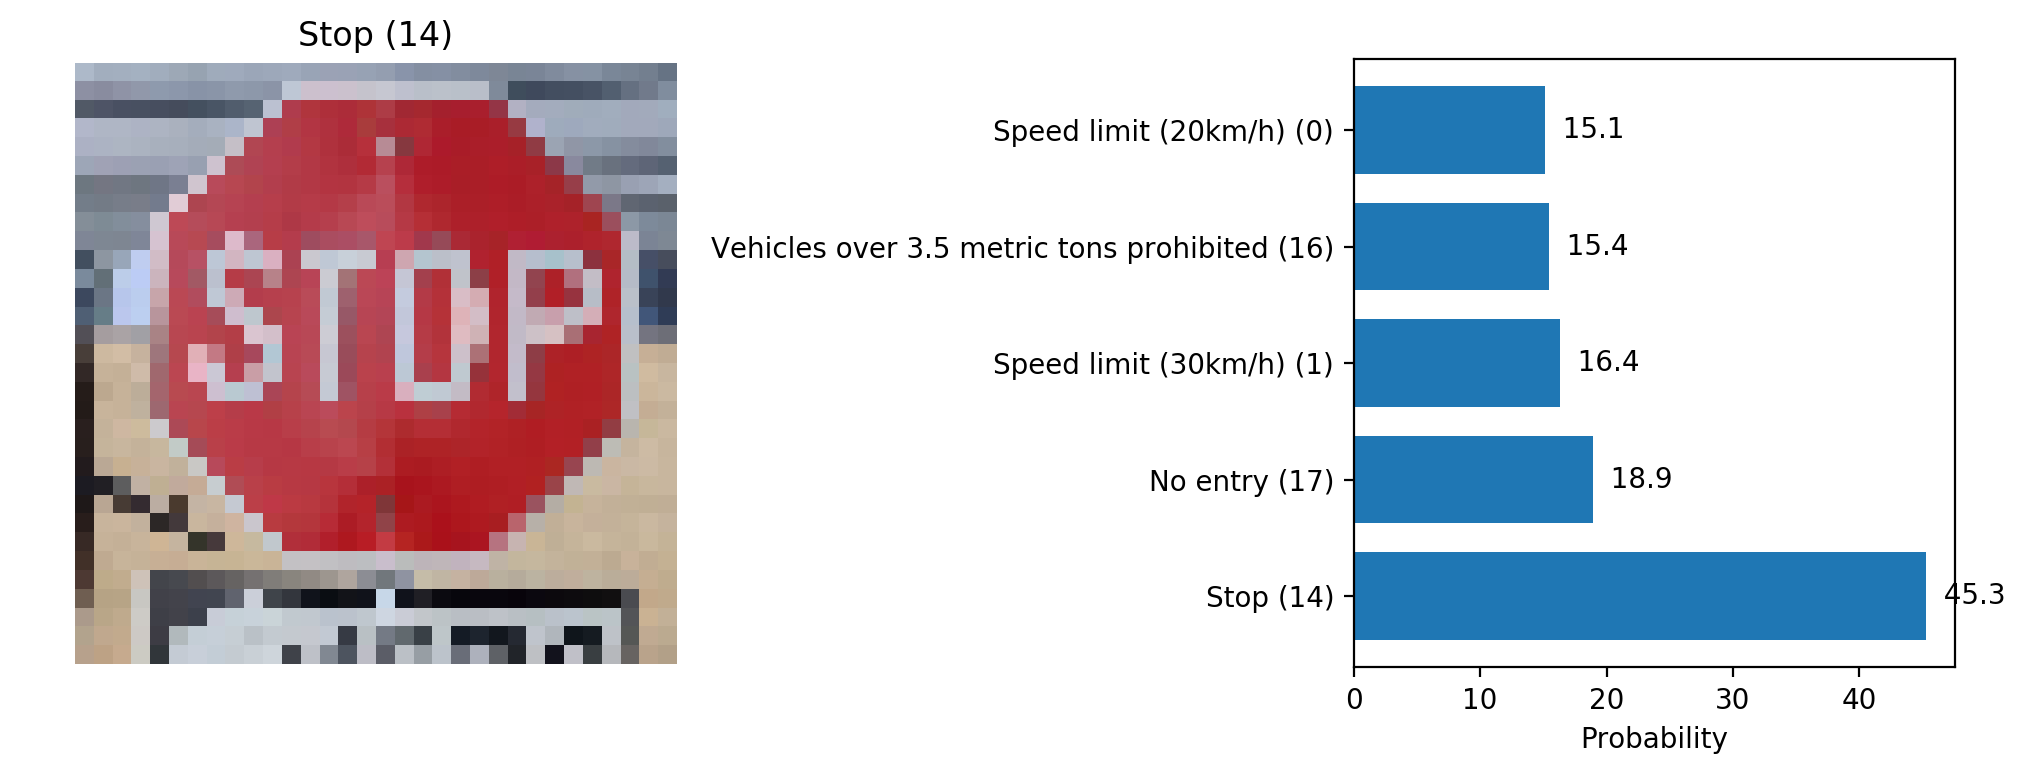

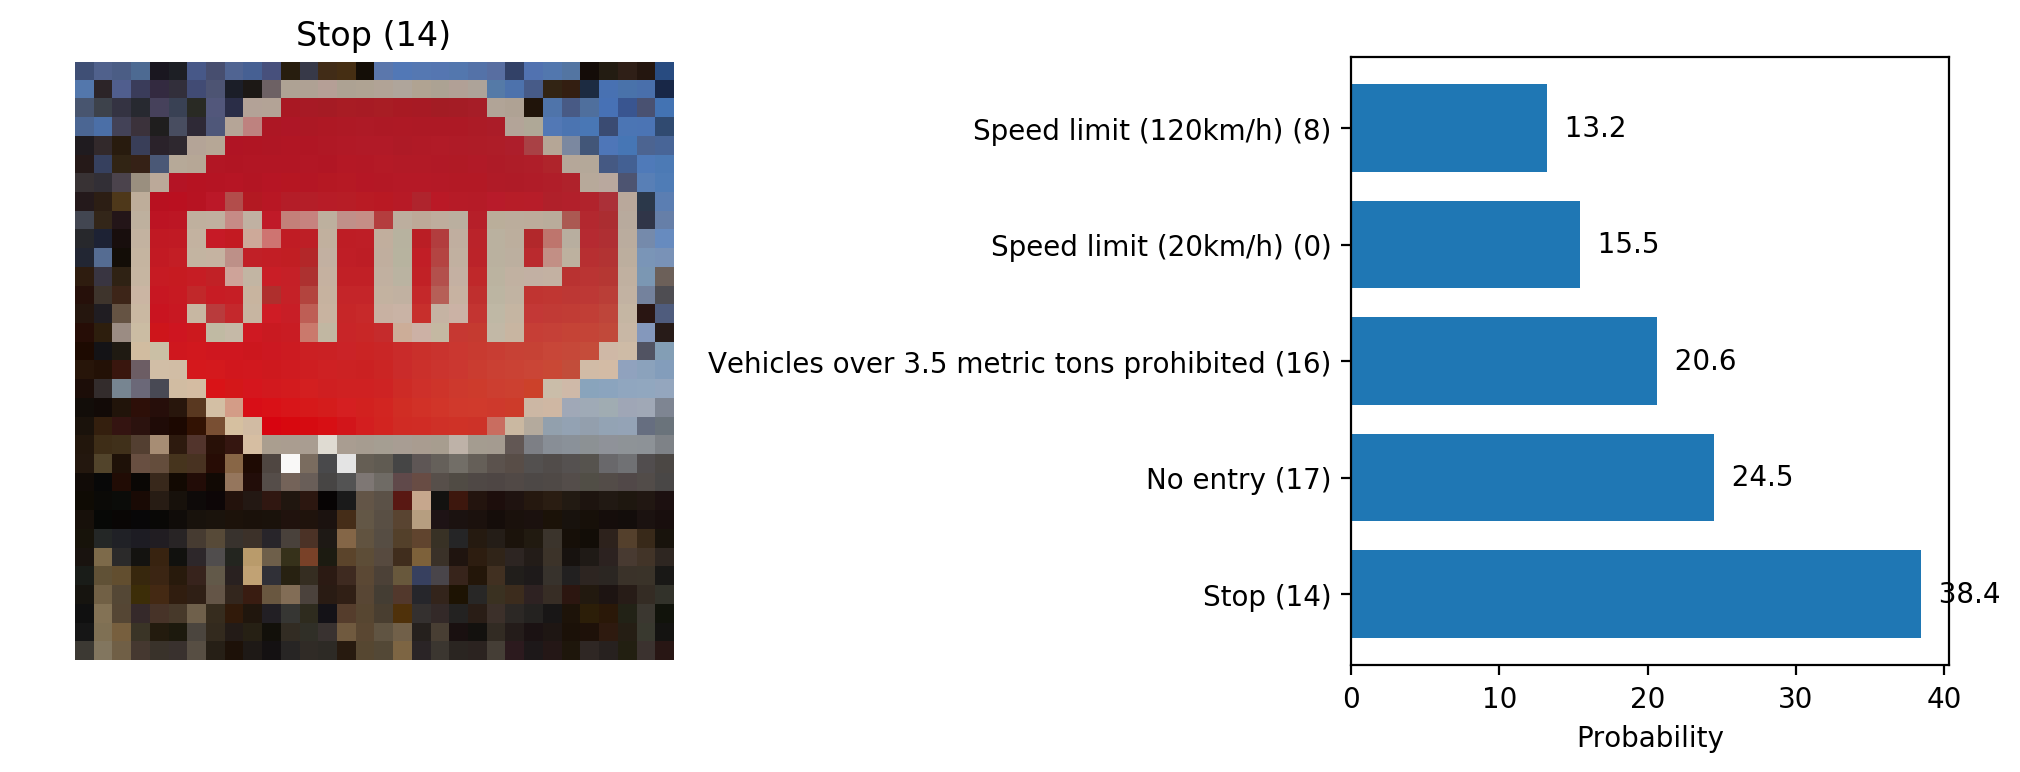

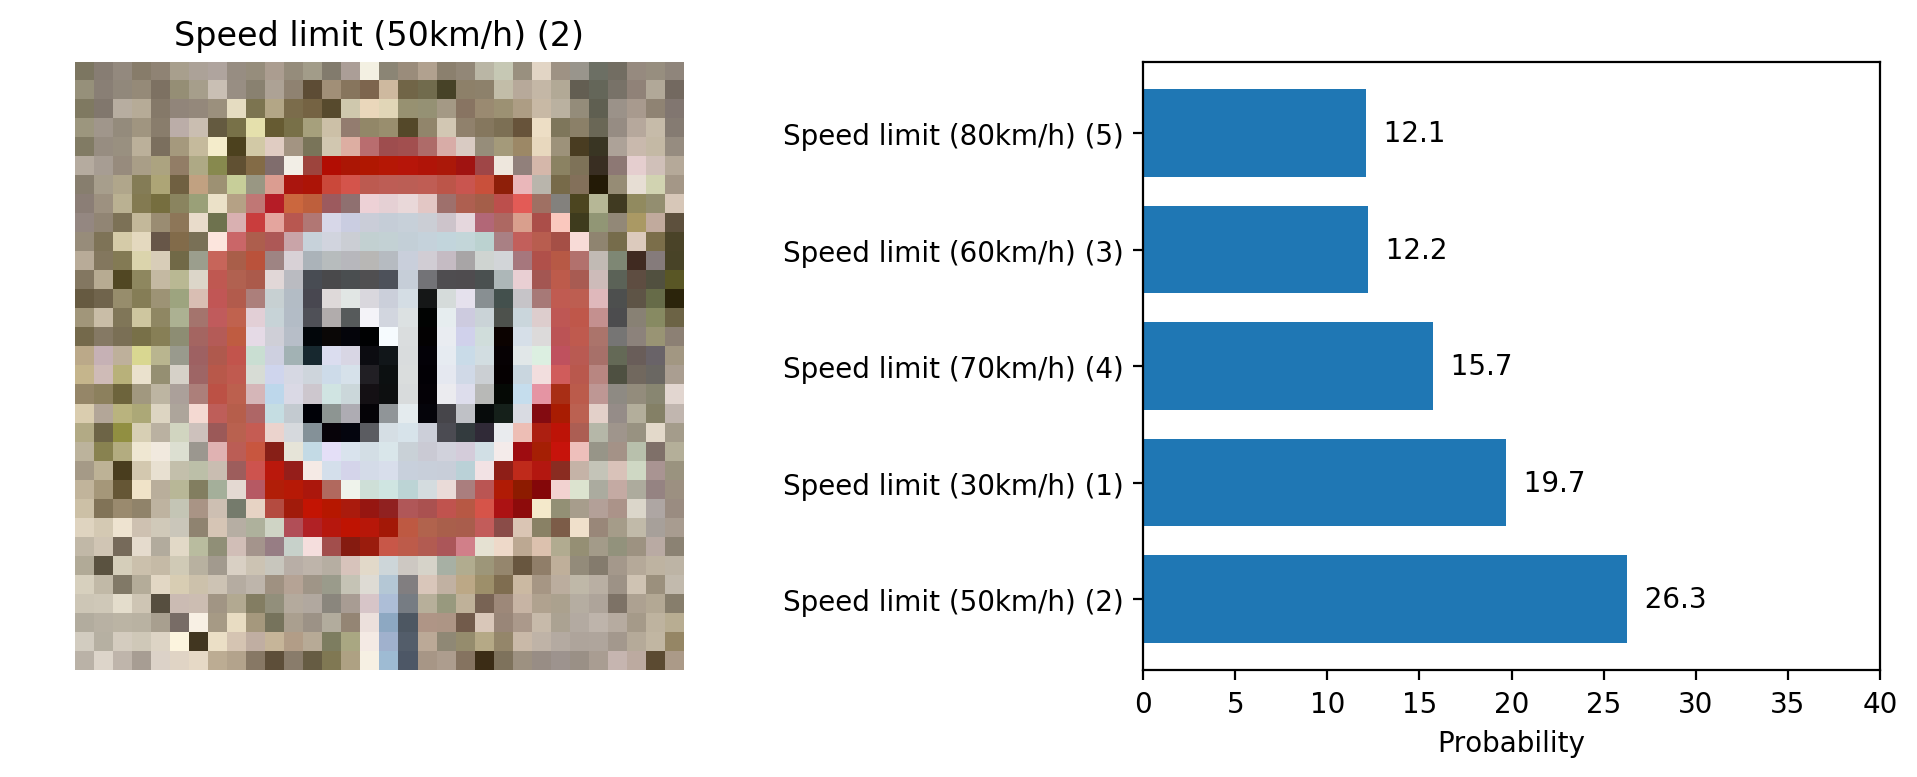

In [107]:
%matplotlib inline
plt.rcdefaults()

indices = result.indices
values = result.values
images = X_web_orig
classes = y_web

for img_idx in range(len(values)):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.subplots_adjust(wspace=0.5)
    img_ax = axes[0]
    bar_ax = axes[1]

    img_ax.imshow(images[img_idx])
    expected_cls = classes[img_idx]
    img_ax.set_title("{} ({})".format(signnames_df.loc[expected_cls].SignName, expected_cls))
    img_ax.axis('off')

    idx = np.arange(top_n)
    cls_prob = [values[img_idx][i] for i in idx]
    rects = bar_ax.barh(idx, cls_prob, 0.75)
    for i, prob in enumerate(cls_prob):
        bar_ax.text(prob, i, "{:6.1f}".format(prob), verticalalignment='center')
        
    bar_ax.set_yticks(idx)
    ticklabels = [
        "{} ({})".format(item[2], item[1])
        for item in signnames_df.loc[indices[img_idx]].itertuples()
    ]
    bar_ax.set_yticklabels(ticklabels, minor=False)
    #bar_ax.set_ylabel('Class')
    bar_ax.set_xlabel('Probability')
    bar_ax.xaxis.set_view_interval(vmin=0.0, vmax=40.0)
    plt.tight_layout()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [108]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, sess, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={input_x : image_input,
                                                            keep_prob: [1.0] * keep_prob.shape[0]})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(15,17, featuremap+1) # sets the number of feature maps to show on each row and column
        #plt.title(str(featuremap)) # displays the feature map number
        plt.subplots_adjust(hspace=0.0, wspace=0.0)
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

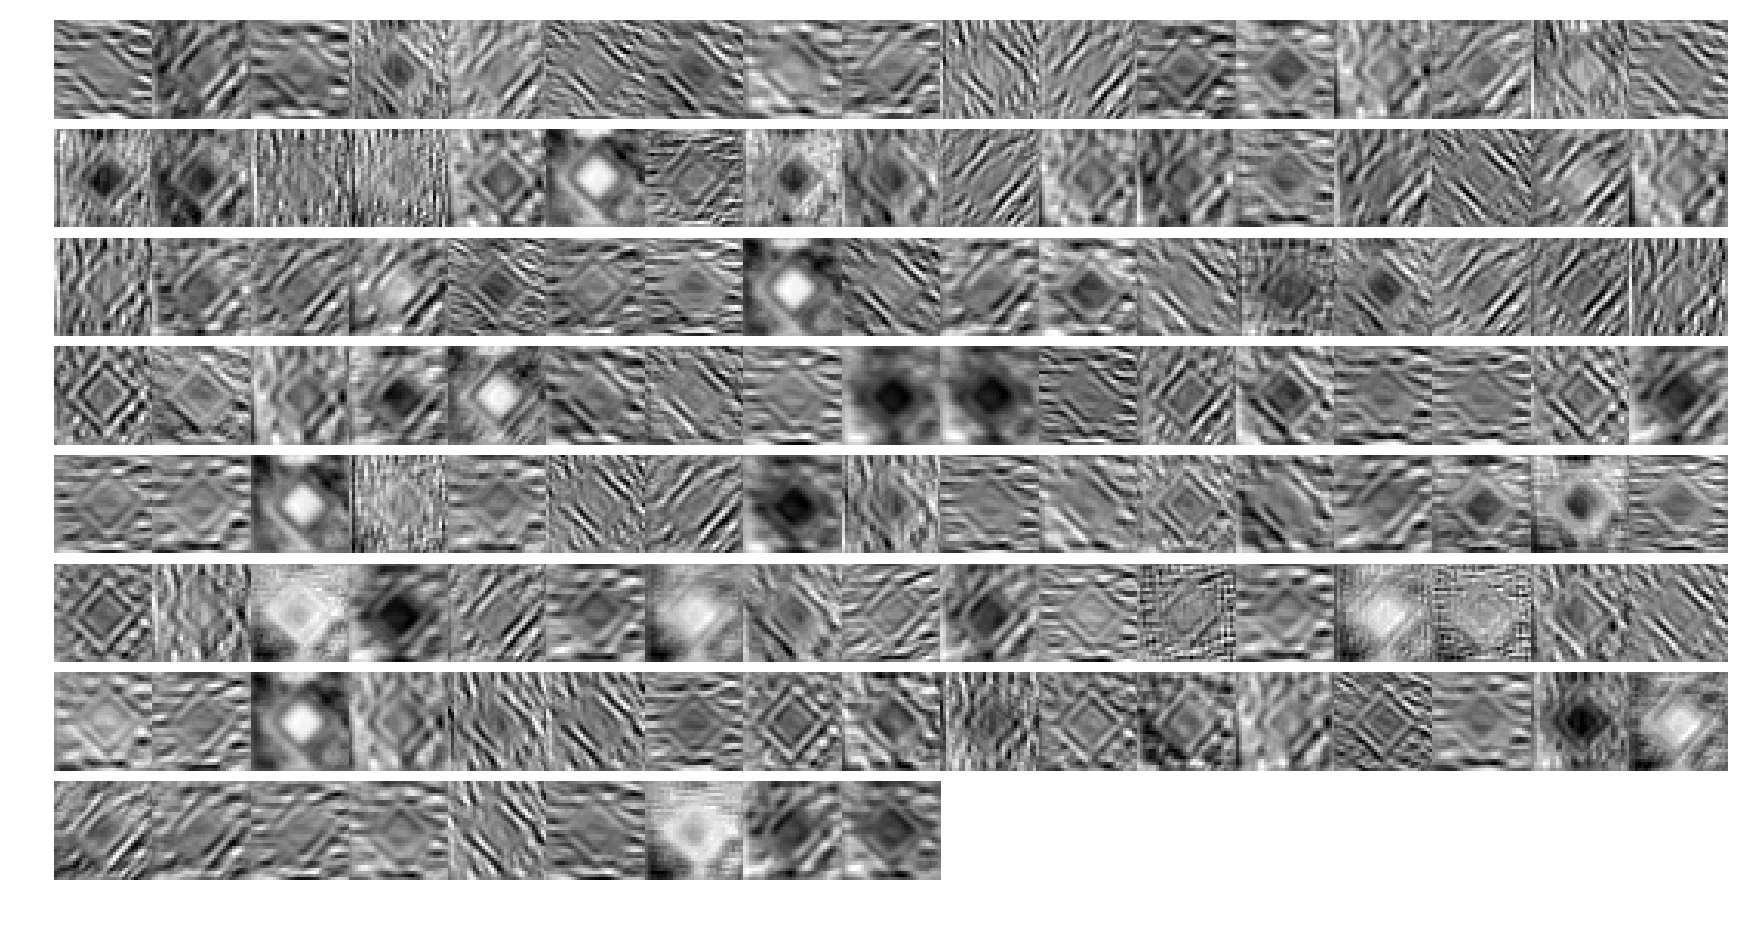

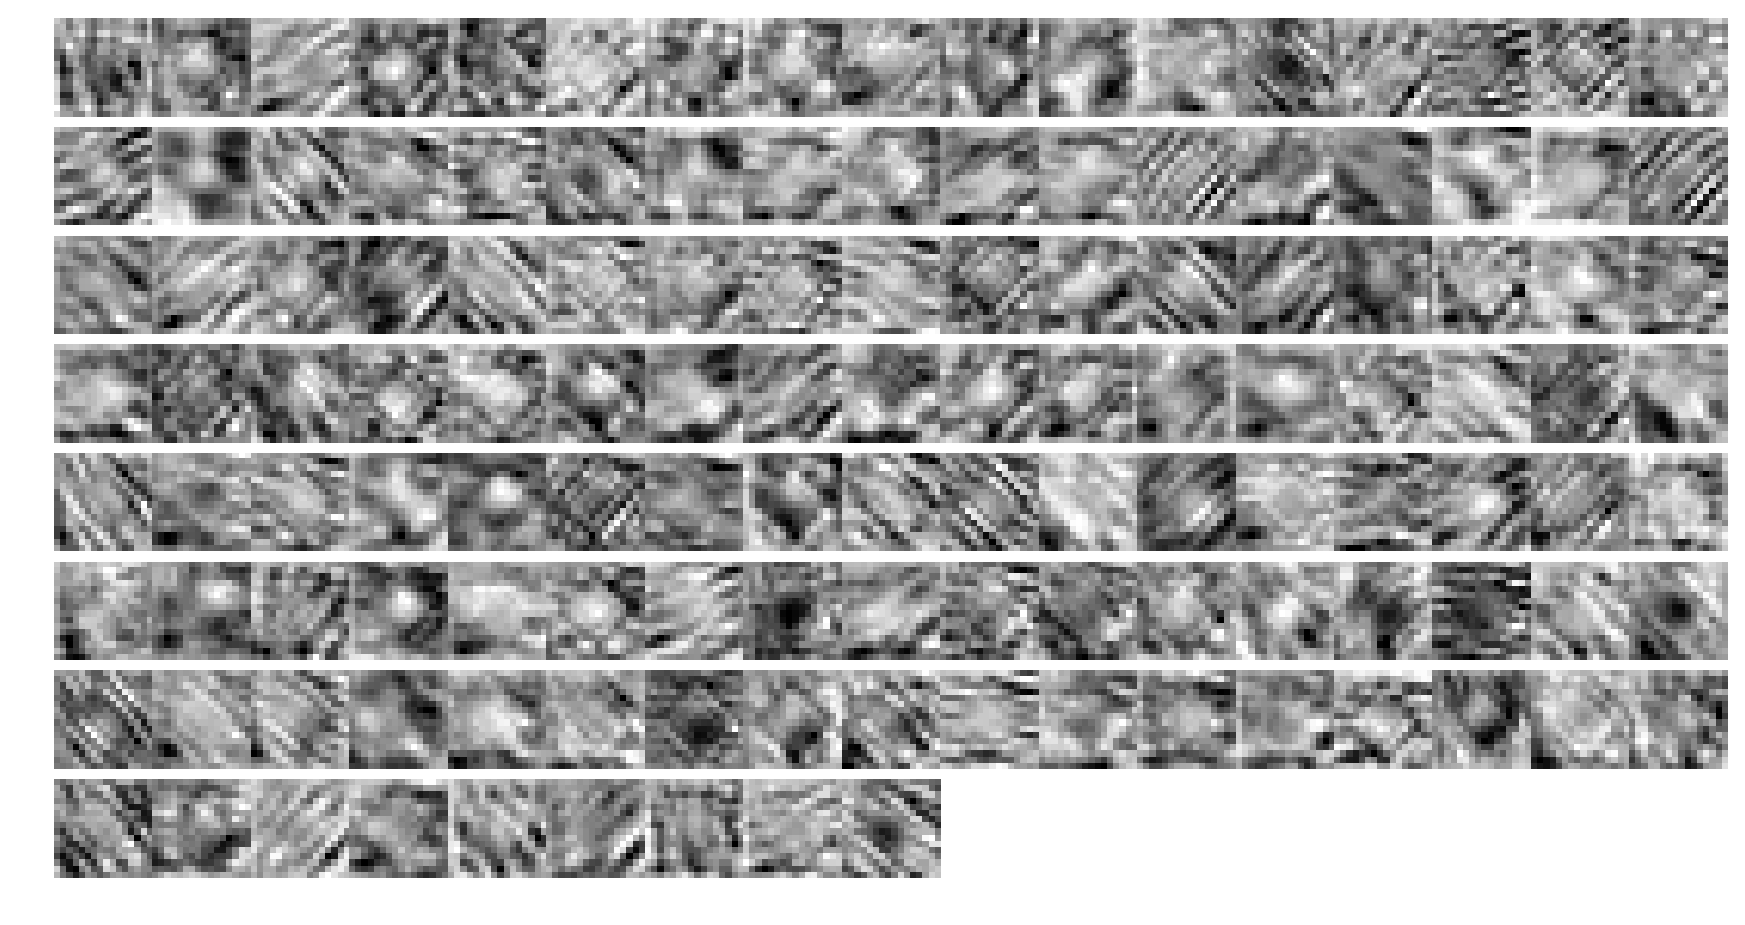

In [109]:
%matplotlib inline

with tf.Session() as sess:
    saver.restore(sess, state_file_best)
    outputFeatureMap([X_test[300]], tf.get_default_graph().get_tensor_by_name(
        "{}/conv_1/add:0".format(namespace)), sess)
    plt.show()
    outputFeatureMap([X_test[300]], tf.get_default_graph().get_tensor_by_name(
        "{}/conv_2/add:0".format(namespace)), sess)
    plt.show()
    #outputFeatureMap([X_test[300]], tf.get_default_graph().get_tensor_by_name("ms10/conv_3/add:0"), sess)
    #plt.show()

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 